# Optimizing Sourcing and Pricing Strategies for GlobeHarvest Co. in Kenya

## Collaborators
    . Joyce Chepng'eno
    . Sarah Karanja
    . Brandon Muraya
    . Pete Njagi
    . Tom Mwambire
    . James Koli

## 1. <b>Introduction</b>
GlobeHarvest Co. is an emerging import-export company poised to enter the Kenyan agricultural market. With a commitment to leveraging data-driven strategies, GlobeHarvest aims to optimize its sourcing and pricing strategies to establish a competitive presence in Kenya's agricultural sector. By harnessing the power of data analytics, GlobeHarvest seeks to gain valuable insights into market dynamics, consumer preferences, and pricing trends to drive informed decision-making and maximize profitability.

## 1.1 Business Understanding:
Kenya's agricultural market offers immense potential for GlobeHarvest Co., characterized by diverse regions with varying agricultural capabilities and consumer demands. However, navigating this complex landscape presents several challenges, including identifying cost-effective sourcing locations, strategically timing purchases, and ensuring competitive pricing amid price variabilities across regions. To succeed in the Kenyan market, GlobeHarvest must develop a deep understanding of market dynamics, consumer behavior, and competitive factors to optimize its procurement processes and pricing strategies effectively.

## 1.2 Problem Statement:
GlobeHarvest Co. faces the following key challenges in entering the Kenyan agricultural market:

**Identifying Optimal Sourcing Locations**: The company needs to identify the most cost-effective sourcing locations across different Kenyan counties to minimize procurement costs and ensure a reliable supply chain.

**Timing Purchases Strategically**: GlobeHarvest requires insights into the optimal timing for purchasing various commodities, considering seasonal fluctuations, market trends, and price dynamics.

**Navigating Price Variabilities**: Significant price discrepancies exist across different regions in Kenya, necessitating a systematic approach to ensure competitive pricing and optimize profitability.

**Ensuring Competitiveness by effective and accurate price prdeiction**: GlobeHarvest aims to better understand how commodities are priced in the Kenyan market and accurately and effectively predict prices to gain a competitive advantage in the market.

## 1.3 Objectives:
The primary objectives of GlobeHarvest Co. in optimizing its sourcing and pricing strategies for the Kenyan market are as follows:

**Identify Cost-Effective Sourcing Locations**: Analyze data to identify regions in Kenya that offer the most cost-effective sourcing opportunities for various food commodities.

**Strategically Time Purchases**: Utilize historical data and market insights to determine the optimal timing for purchasing specific commodities, considering seasonal trends and market dynamics.

**Navigate Price Variabilities**: Develop strategies to navigate price variabilities across different regions in Kenya, ensuring competitive pricing and maximizing profitability.


## 1.4 Data Understanding:

The dataset obtained from Kaggle consists of food price data collected in Kenya, providing valuable insights into the pricing dynamics of various food commodities across different regions and markets. The dataset contains the following columns:

**date**: The date of the price observation.

**admin1**: The first-level administrative division (e.g., province or county) in Kenya.

**admin2**: The second-level administrative division (e.g., district or sub-county) in Kenya.

**market**: The name of the market where the price was recorded.

**latitude**: The latitude coordinates of the market location.

**longitude**: The longitude coordinates of the market location.

**category**: The category of the food commodity (e.g., cereals and tubers, pulses and nuts, meat, fish, and eggs).

**commodity**: The specific name of the food commodity.

**unit**: The unit of measurement for the price (e.g., KG for kilograms, G for grams).

**priceflag**: Flag indicating the nature of the price observation (e.g., actual, aggregate).

**pricetype**: The type of price (e.g., Wholesale, Retail).

**currency**: The currency used for pricing (e.g., KES for Kenyan Shilling).

**price**: The price of the commodity in the local currency.

**usdprice**: The price of the commodity converted to USD.

The dataset contains 10,767 rows, each representing a unique observation of food prices in a specific market on a particular date. This dataset provides a comprehensive view of food pricing trends and variations across different regions and market types in Kenya, offering valuable insights for analysis and decision-making in the agricultural sector.

## 2. <b>Loading data and libraries</b>

### 2.1 Loading important libraries

In [121]:
# Importing relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from IPython.display import display, HTML
from IPython.display import IFrame
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
import pickle

In [122]:
#importing the dataframe as df
df = pd.read_csv('wfp_food_prices_ken.csv')
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
3,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.0,0.2355
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,KES,1249.99,17.3175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10758,2024-03-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Potatoes (Irish),KG,aggregate,Retail,KES,80.0,0.597
10759,2024-03-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Rice,KG,aggregate,Retail,KES,185.0,1.3806
10760,2024-03-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,miscellaneous food,Salt,200 G,aggregate,Retail,KES,12.5,0.0933
10761,2024-03-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,miscellaneous food,Sugar,KG,aggregate,Retail,KES,200.0,1.4925


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       10763 non-null  object
 1   admin1     10763 non-null  object
 2   admin2     10763 non-null  object
 3   market     10763 non-null  object
 4   latitude   10763 non-null  object
 5   longitude  10763 non-null  object
 6   category   10763 non-null  object
 7   commodity  10763 non-null  object
 8   unit       10763 non-null  object
 9   priceflag  10763 non-null  object
 10  pricetype  10763 non-null  object
 11  currency   10763 non-null  object
 12  price      10763 non-null  object
 13  usdprice   10763 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


In [124]:
df.describe()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,10763,10763,10763,10763,10763,10763,10763,10763,10763,10763,10763,10763,10763,10763
unique,219,8,23,63,63,63,9,48,15,3,3,2,5184,8154
top,2021-04-15,Rift Valley,Nairobi,Nairobi,-1.283333,36.816667,cereals and tubers,Maize,KG,actual,Wholesale,KES,10.0,0.091
freq,386,4252,2236,1107,1107,1107,5320,1135,4809,6956,5597,10762,247,24


The cells above give general information on the dataframe

In [125]:
print("\nUnique Values for Categorical Columns:")
for col in df.select_dtypes(include=['object']):
    print(f"{col}: {df[col].nunique()} unique values")



Unique Values for Categorical Columns:
date: 219 unique values
admin1: 8 unique values
admin2: 23 unique values
market: 63 unique values
latitude: 63 unique values
longitude: 63 unique values
category: 9 unique values
commodity: 48 unique values
unit: 15 unique values
priceflag: 3 unique values
pricetype: 3 unique values
currency: 2 unique values
price: 5184 unique values
usdprice: 8154 unique values


The output above shows information on unique values in the data columns

In [126]:
df['admin1'].unique()

array(['#adm1+name', 'Coast', 'Eastern', 'Nairobi', 'Nyanza',
       'Rift Valley', 'North Eastern', 'Central'], dtype=object)

In [127]:
df['admin2'].unique()

array(['#adm2+name', 'Mombasa', 'Kitui', 'Nairobi', 'Kisumu', 'Turkana',
       'Uasin Gishu', 'Marsabit', 'Mandera', 'Nakuru', 'Kilifi',
       'Tana River', 'Baringo', 'Kajiado', 'Garissa', 'Nyeri', 'Kwale',
       'Makueni', 'West Pokot', 'Machakos', 'Meru South', 'Isiolo',
       'Wajir'], dtype=object)

The cells above show the unique value in Provinces(admin1) and Counties(admin2) data columns

In [128]:
df.shape

(10763, 14)

From the output above the dataframe has 10763 records and 14 columns.

### 2.2 Checking for null and duplicate values

In [129]:
df.isnull().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

In [130]:
df.duplicated().sum()

0

It also contains no null values. It also contains no duplicated values

In [131]:
df = df.drop(0)
df = df.drop(['priceflag', 'usdprice'], axis=1)

In [132]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,currency,price
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,Wholesale,KES,16.13
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,Wholesale,KES,33.63
3,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,Retail,KES,17.0
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,Wholesale,KES,1249.99
5,2006-01-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,cereals and tubers,Potatoes (Irish),50 KG,Wholesale,KES,664.43


The first row contained duplicated informtaion about the column and thus could be removed. The priceflacg and usdprice columns contained data that would not be usefull to the project hence their removal

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10762 entries, 1 to 10762
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       10762 non-null  object
 1   admin1     10762 non-null  object
 2   admin2     10762 non-null  object
 3   market     10762 non-null  object
 4   latitude   10762 non-null  object
 5   longitude  10762 non-null  object
 6   category   10762 non-null  object
 7   commodity  10762 non-null  object
 8   unit       10762 non-null  object
 9   pricetype  10762 non-null  object
 10  currency   10762 non-null  object
 11  price      10762 non-null  object
dtypes: object(12)
memory usage: 1009.1+ KB


### 2.3 Feature Engineering
This section deals with manipulating existing data to transform them or come up with new features to give more information that will be benefitial in achieving project objectives

In [134]:
#changing collumn Names for easy understanding and analysis
df = df.rename(columns={'admin1': 'Provinces', 'admin2': 'Counties'})

In [135]:
# Converting 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [136]:
#generating year and month column from the 'date' feature
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

The above cells deal with convering the date column into datetime data type and then creating the 'year' and the 'month' column based on the data information

The commodity information contains information on products in different units and their resprctive prices. In order to accurately use the commodity informtaion in analysis and prediction, the commodity information and unit need to be converted into standard unit. The standard unit will then enable the creation of a new feature price per standar unit which will put all the units on a simmilar scale. This is done over the next couple of cells

In [137]:
# Standardazing our metrics 
conversion_factors = {
    'KG': 1,
    '90 KG': 90,
    '400 G': 0.4,
    '50 KG': 50,
    '500 ML': 0.5,
    'L': 1,  
    '200 ML': 0.2,
    'Unit': 1,  
    'Bunch': 1,  
    '64 KG': 64,
    '13 KG': 13,
    '126 KG': 126,
    '200 G': 0.2,
    'Head': 1  
}


def standardize_unit(row):
    unit = row['unit']
    if unit in conversion_factors:
        return conversion_factors[unit]
    else:
        return None  


df['standardized_unit'] = df.apply(standardize_unit, axis=1)

print(df.head())  


        date Provinces Counties   market   latitude  longitude  \
1 2006-01-15     Coast  Mombasa  Mombasa      -4.05  39.666667   
2 2006-01-15     Coast  Mombasa  Mombasa      -4.05  39.666667   
3 2006-01-15   Eastern    Kitui    Kitui  -1.366667  38.016667   
4 2006-01-15   Eastern    Kitui    Kitui  -1.366667  38.016667   
5 2006-01-15   Nairobi  Nairobi  Nairobi  -1.283333  36.816667   

             category         commodity   unit  pricetype currency    price  \
1  cereals and tubers             Maize     KG  Wholesale      KES    16.13   
2     pulses and nuts             Beans     KG  Wholesale      KES    33.63   
3  cereals and tubers     Maize (white)     KG     Retail      KES     17.0   
4  cereals and tubers  Potatoes (Irish)  50 KG  Wholesale      KES  1249.99   
5  cereals and tubers  Potatoes (Irish)  50 KG  Wholesale      KES   664.43   

   year  month  standardized_unit  
1  2006      1                1.0  
2  2006      1                1.0  
3  2006      1      

In [138]:
#Ensuring the 'standardiszed_unit' column only contains numerical values
contains_strings = pd.to_numeric(df['standardized_unit'], errors='coerce').isnull().any()

if contains_strings:
    print("The 'standardized_unit' column contains strings.")
else:
    print("The 'standardized_unit' column does not contain strings.")


The 'standardized_unit' column does not contain strings.


In [139]:
#converts price, latitude and longitude into float data types
df['price'] = df['price'].astype(float)
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

In [140]:
df.dtypes

date                 datetime64[ns]
Provinces                    object
Counties                     object
market                       object
latitude                    float64
longitude                   float64
category                     object
commodity                    object
unit                         object
pricetype                    object
currency                     object
price                       float64
year                          int32
month                         int32
standardized_unit           float64
dtype: object

In [141]:
# Calculate the price per standardized unit 
df['price_per_standard_unit'] = (df['price'] / df['standardized_unit']).round(2)
df


,date,Provinces,Counties,market,latitude,longitude,category,commodity,unit,pricetype,currency,price,year,month,standardized_unit,price_per_standard_unit
1,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,Wholesale,KES,16.13,2006,1,1.0,16.13
2,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,Wholesale,KES,33.63,2006,1,1.0,33.63
3,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,Retail,KES,17.00,2006,1,1.0,17.00
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,Wholesale,KES,1249.99,2006,1,50.0,25.00
5,2006-01-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,cereals and tubers,Potatoes (Irish),50 KG,Wholesale,KES,664.43,2006,1,50.0,13.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10758,2024-03-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.717080,34.850333,cereals and tubers,Potatoes (Irish),KG,Retail,KES,80.00,2024,3,1.0,80.00
10759,2024-03-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.717080,34.850333,cereals and tubers,Rice,KG,Retail,KES,185.00,2024,3,1.0,185.00
10760,2024-03-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.717080,34.850333,miscellaneous food,Salt,200 G,Retail,KES,12.50,2024,3,0.2,62.50
10761,2024-03-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.717080,34.850333,miscellaneous food,Sugar,KG,Retail,KES,200.00,2024,3,1.0,200.00


## 3. <b>Exploratory Data Analysis</b>
This section deals with going through the data to make visualizations that help in uncovering insight or new information from the data

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


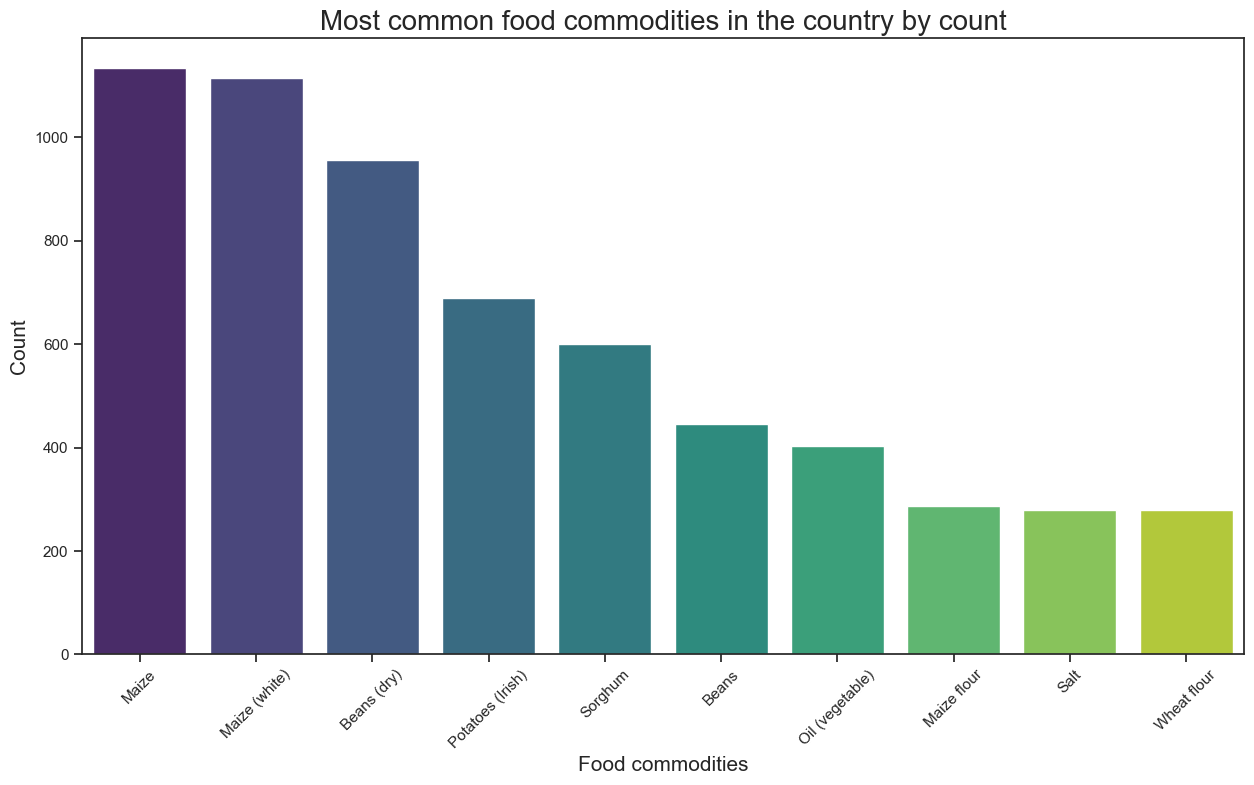

In [142]:

# Sample data
cities = df['commodity'].value_counts()[:10].index
counts = df['commodity'].value_counts()[:10]

# Generate a seaborn color palette
colors = sns.color_palette("viridis", len(cities))

# Plotting the bar graph with unique colors
plt.figure(figsize=(15, 8))
sns.barplot(x=cities, y=counts, palette=colors)
plt.xlabel("Food commodities", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Most common food commodities in the country by count", fontsize=20)
plt.xticks(rotation=45)
plt.show()


The visualization above shows the most popular food commodities in the country by count. From it Maize in both its variaties seem to be the most popular followed by dried beans and Potatoes(Irish)

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


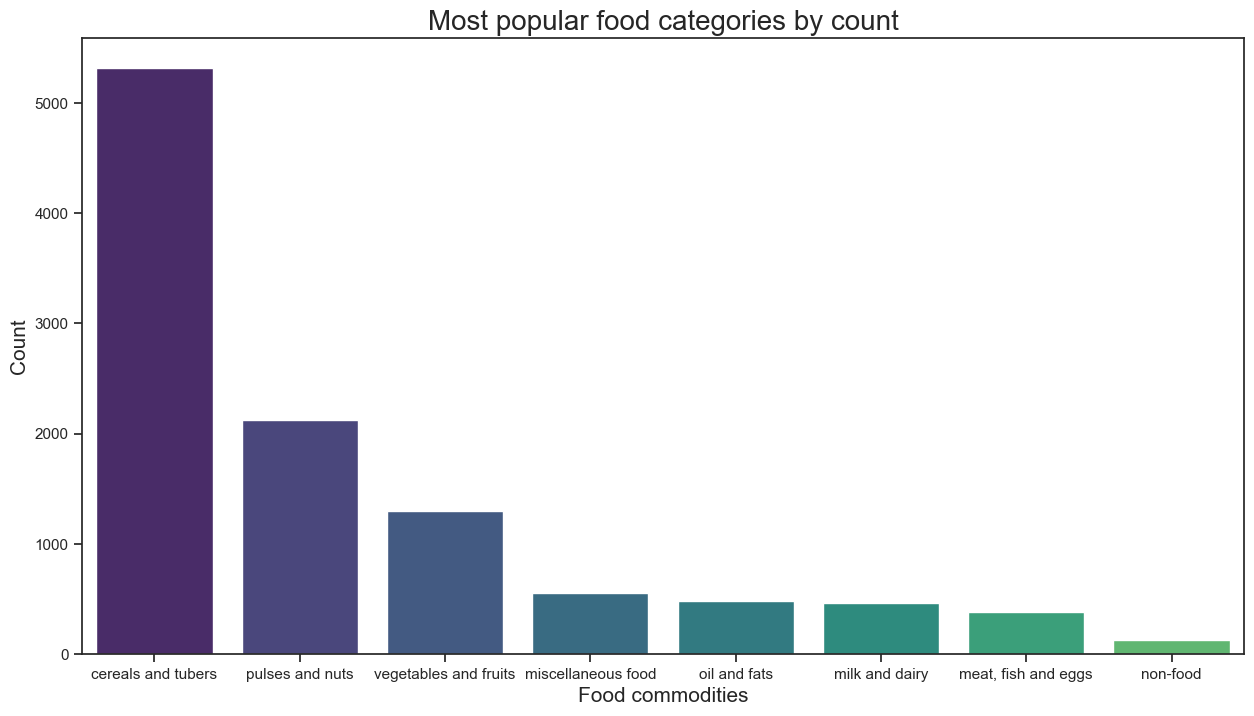

In [143]:
food_categorises = df['category'].value_counts()[:10].index
counts = df['category'].value_counts()[:10]

# Plotting the bar graph with unique colors using Seaborn
colors = sns.color_palette("viridis", len(cities))

plt.figure(figsize=(15, 8))
sns.barplot(x=food_categorises, y=counts, palette=colors)
plt.xlabel("Food commodities", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Most popular food categories by count", fontsize=20)

plt.show()

From the visualization above, cereals and tubers seem to be the most popular food category by a big margin. This indicates that the country as a whole consume cereals and tuber more than any other food category, the pulses and nuts in a distant second and then vegetables and fruits

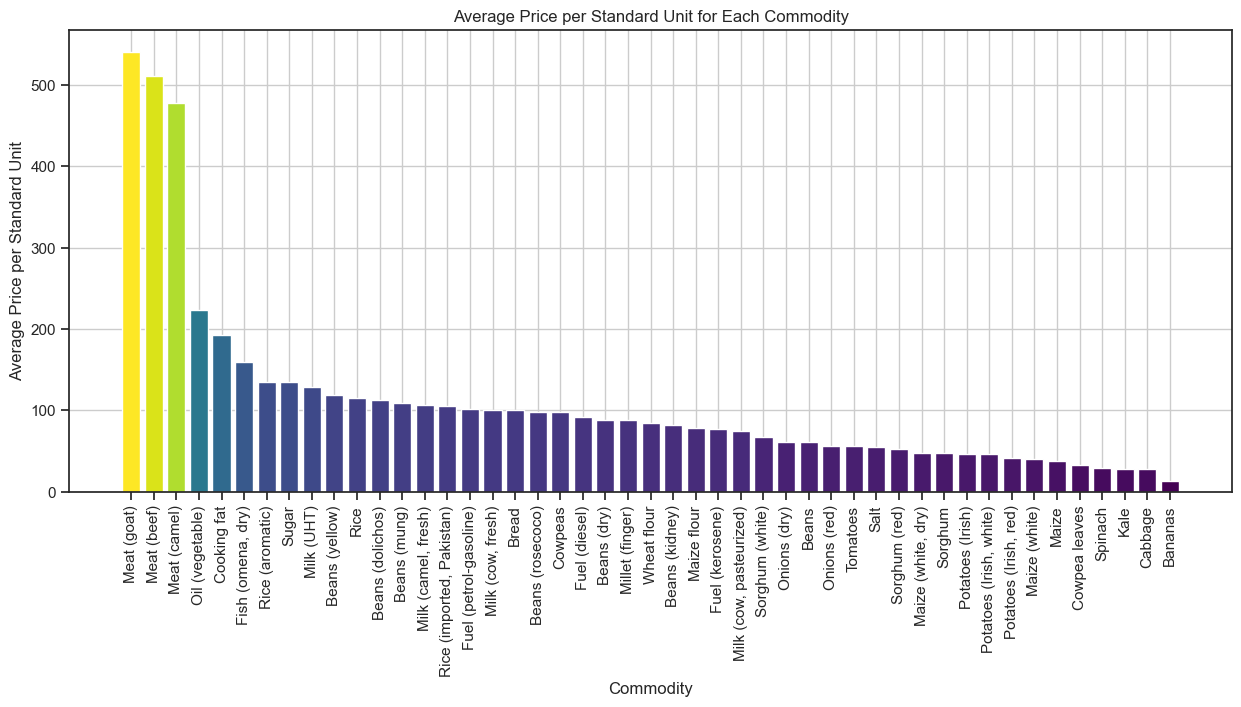

In [144]:

# Calculating the average price per standard unit for each commodity
average_price_per_unit = df.groupby('commodity')['price_per_standard_unit'].mean().sort_values(ascending=False)


cmap = plt.cm.viridis

# Normalizing the average prices to [0, 1] range for colormap mapping
normalized_prices = (average_price_per_unit.values - average_price_per_unit.values.min()) / (average_price_per_unit.values.max() - average_price_per_unit.values.min())

# Creating a bar plot with varied colors based on the average price per standard unit
plt.figure(figsize=(15, 6))
bars = plt.bar(x=average_price_per_unit.index, height=average_price_per_unit.values, color=cmap(normalized_prices))
plt.title('Average Price per Standard Unit for Each Commodity')
plt.xlabel('Commodity')
plt.ylabel('Average Price per Standard Unit')
plt.xticks(rotation=90)
plt.grid(True)




The visualization above shows the average price per standard unit of commodities in Kenya. From the visualization, Meat (goat, beef and camel) is the costliest commodity. All the types of meat have an average price per standard unti of around 500 ksh. This is then followed by Vegetable Oil and cooking fat. The least expensive on the other hand are fruits and vegetables such as Bananas, Cabbage, Kale and Spinach

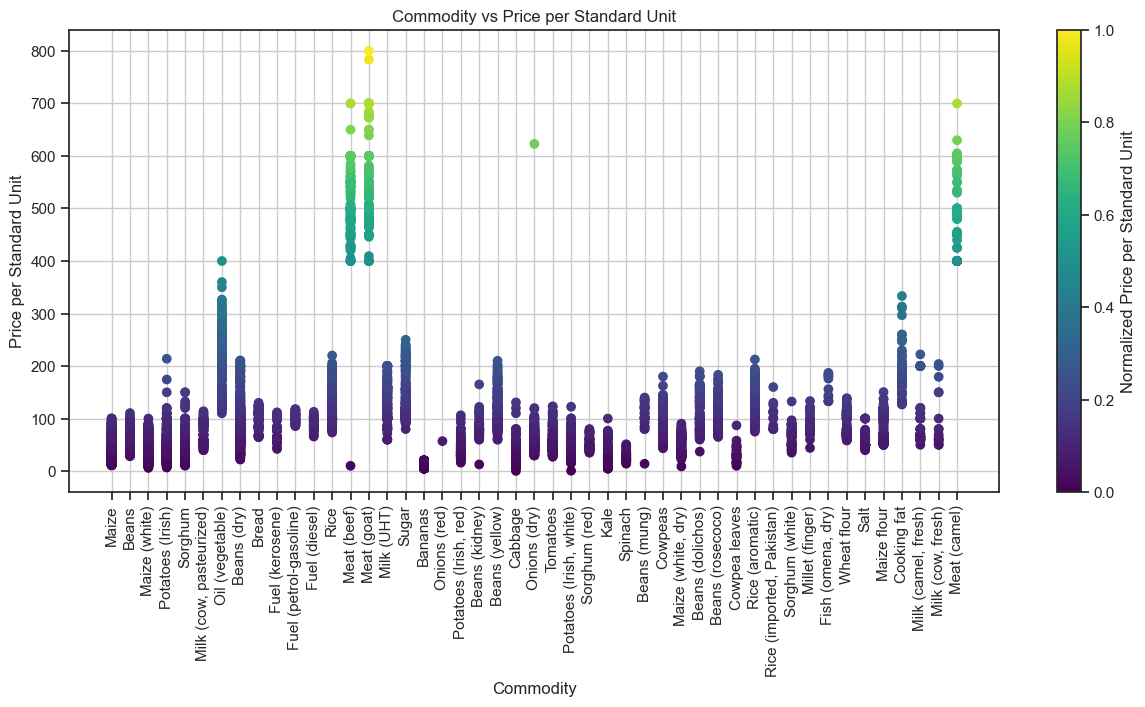

In [145]:
# Define colormap and normalize price_per_standard_unit for colormap mapping
cmap = plt.cm.viridis
normalized_prices = (df['price_per_standard_unit'] - df['price_per_standard_unit'].min()) / (df['price_per_standard_unit'].max() - df['price_per_standard_unit'].min())

# Create scatter plot with varied colors based on price_per_standard_unit
plt.figure(figsize=(15, 6))
plt.scatter(df['commodity'], df['price_per_standard_unit'], c=normalized_prices, cmap=cmap)
plt.title('Commodity vs Price per Standard Unit')
plt.xlabel('Commodity')
plt.ylabel('Price per Standard Unit')
plt.xticks(rotation=90)
plt.colorbar(label='Normalized Price per Standard Unit')
plt.grid(True)
plt.show()

The visualization above shows the price ranges of some of the top commodities accross the country. This shows the ranges of prices in the country per commodity. For instance if we take a look at goat meat, in some areas in the country it could go for as low as 400ksh per kilo and in some areas in the country it could go for as mcuh as 800ksh. This may be due to underlying factors such as ease of availability in the regions the price values were recorder from.

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

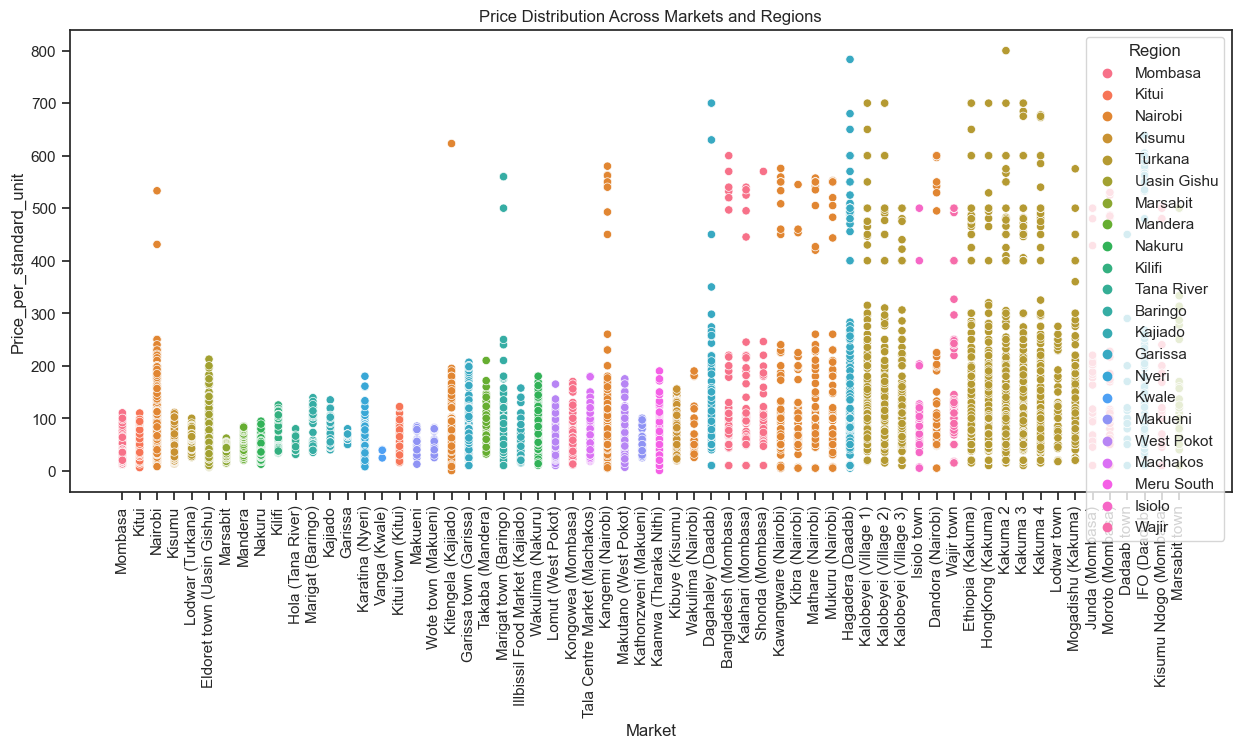

In [146]:
grouped_data = df.groupby(['market', 'Counties'])

# Calculate summary statistics for prices within each group
summary_stats = grouped_data['price_per_standard_unit'].describe()

# Visualize the price distribution across different markets and regions using box plots
plt.figure(figsize=(15, 6))
sns.scatterplot(x='market', y='price_per_standard_unit', hue='Counties', data=df)
plt.title('Price Distribution Across Markets and Regions')
plt.xlabel('Market')
plt.ylabel('Price_per_standard_unit')
plt.xticks(rotation=90)
plt.legend(title='Region')
plt.show()


The visualization above shows the price ranges of various markets across the country and are color coded according to the Counties that the markets are in.

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

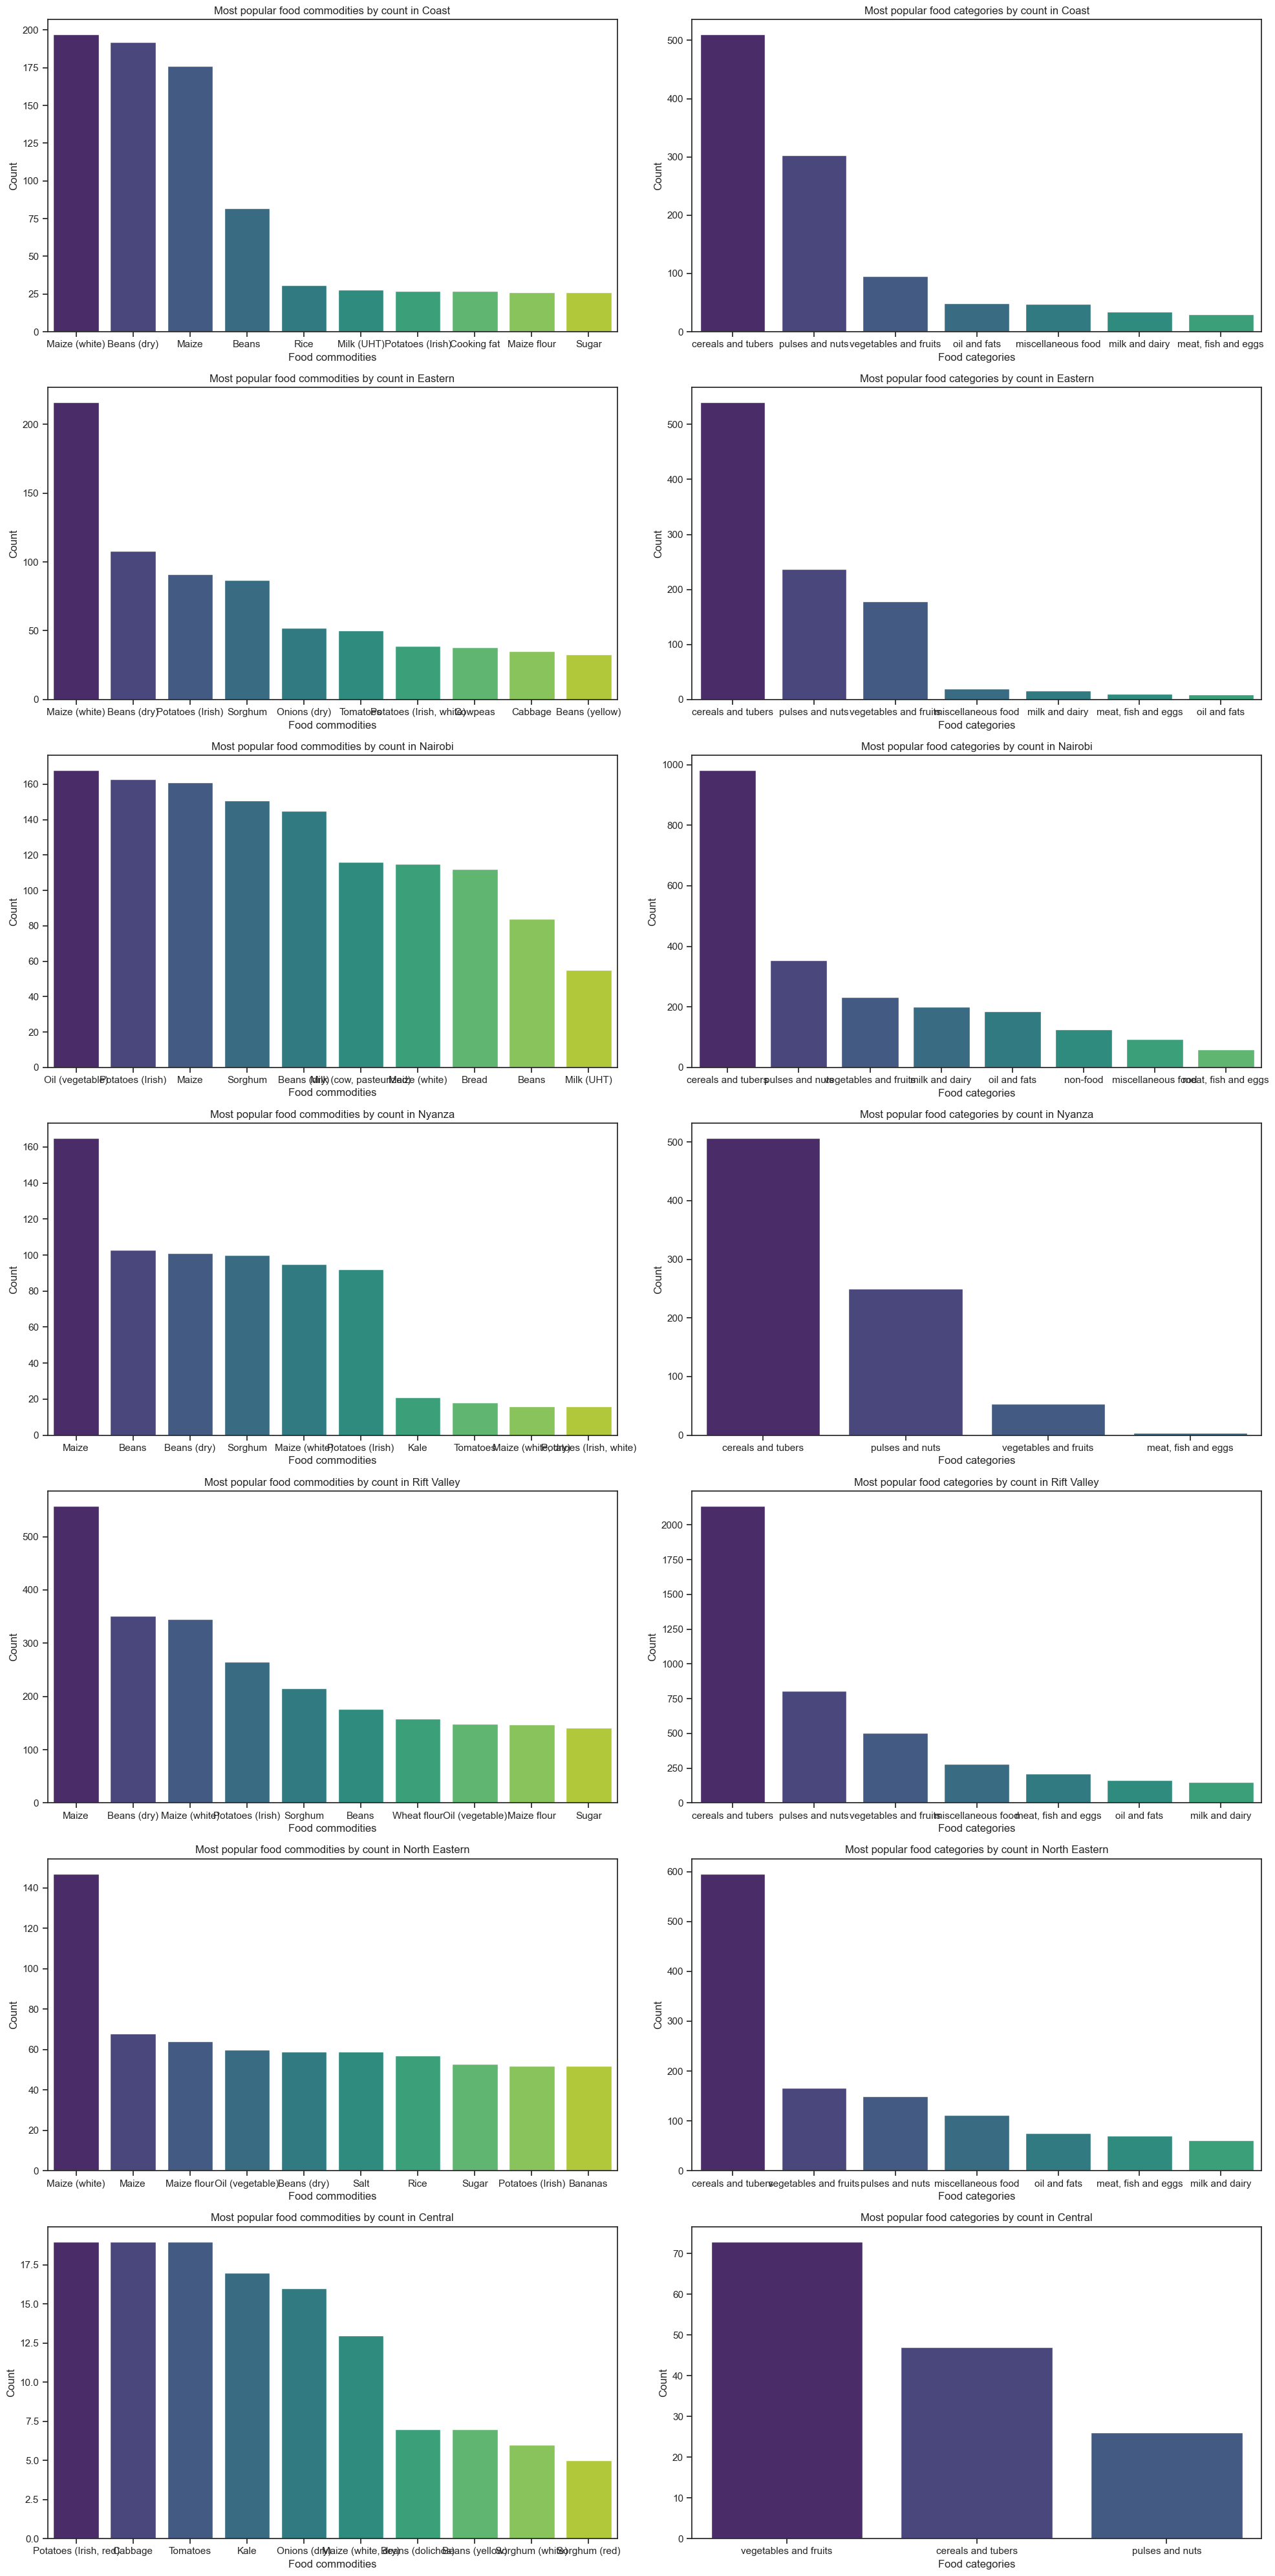

In [147]:
provinces_list = df['Provinces'].unique().tolist()

# Create subplots
fig, ax = plt.subplots(7, 2, figsize=(20, 40))

# Loop over provinces
row_count = 0
for province in provinces_list:
    province_df = df.loc[df['Provinces'] == province]

    # Plot most popular food commodities by count
    commodity_cat = province_df['commodity'].value_counts()[:10].index
    commodity_count = province_df['commodity'].value_counts()[:10]
    sns.barplot(x=commodity_cat, y=commodity_count, palette=colors, ax=ax[row_count, 0])
    ax[row_count, 0].set_xlabel("Food commodities")
    ax[row_count, 0].set_ylabel("Count")
    ax[row_count, 0].set_title(f"Most popular food commodities by count in {province}")

    # Plot most popular food categories by count
    food_categories = province_df['category'].value_counts()[:10].index
    food_categories_counts = province_df['category'].value_counts()[:10]
    sns.barplot(x=food_categories, y=food_categories_counts, palette=colors, ax=ax[row_count, 1])
    ax[row_count, 1].set_xlabel("Food categories")
    ax[row_count, 1].set_ylabel("Count")
    ax[row_count, 1].set_title(f"Most popular food categories by count in {province}")

    row_count += 1

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The visualizations above show the top 10 most popular food commodities and categories in the various Provinces across the country. This offers unique insight as to what residents of a certain region like consuming the most. For example;

- Central Province consume Irish Potatoes the most but their mostly consume vegetables and fruits category of foods then followed by cereals and tubers.

- All other Provinces have maize as the most consumed food commodity.

- Strangely in Nairobi, Vegetable Oil is the most popular food commodity and the followed closely by Maize, Potatoes and Sorghum. This may be because a wider variety of food is consumed and the main constant ingredient in food preparation is vegetable oil. The most popular food category being cereals and tubers still backs up this theory.

### 3.1 Comparing wholesale and retail prices

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

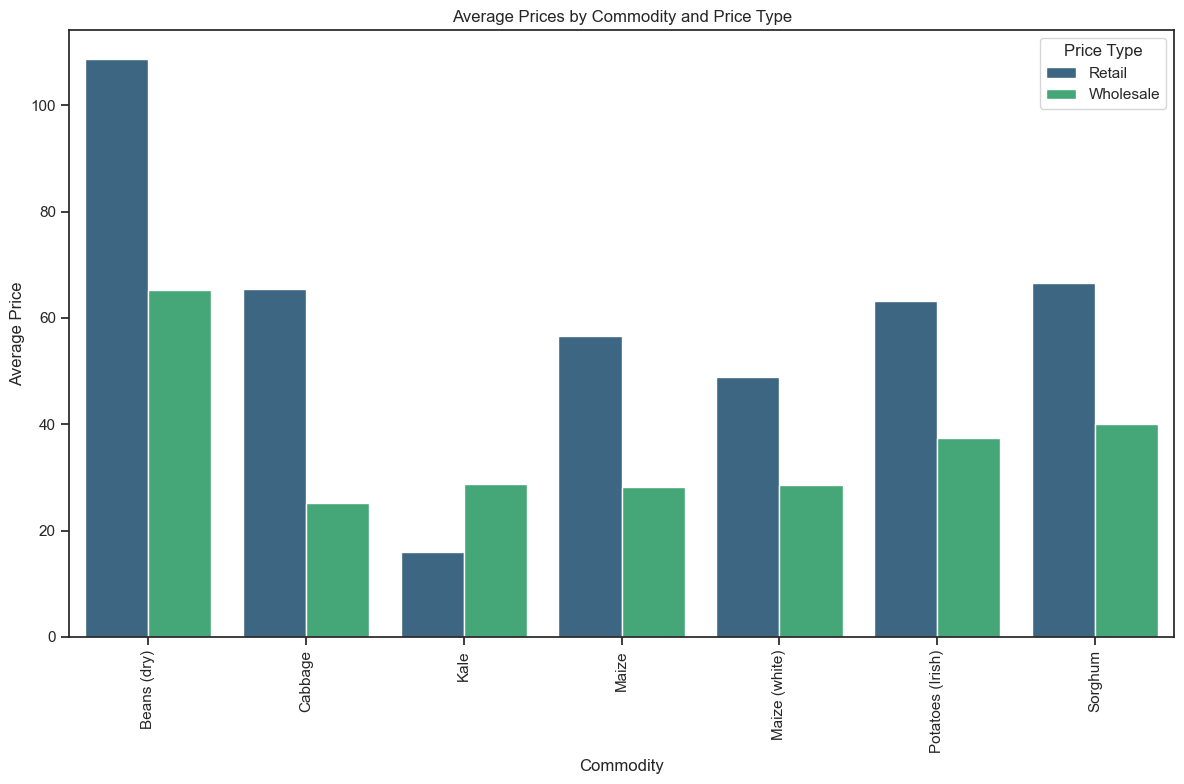

In [148]:
# Filter data for commodities with both wholesale and retail prices
commodities_with_both_prices = df.groupby('commodity')['pricetype'].nunique()
commodities_with_both_prices = commodities_with_both_prices[commodities_with_both_prices == 2].index.tolist()
filtered_df = df[df['commodity'].isin(commodities_with_both_prices)]

# Calculate average prices
average_prices = filtered_df.groupby(['commodity', 'pricetype'])['price_per_standard_unit'].mean().unstack().reset_index()

# Plot average prices using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=average_prices.melt(id_vars='commodity', var_name='Price Type', value_name='Average Price'),
            x='commodity', y='Average Price', hue='Price Type', palette='viridis')
plt.title('Average Prices by Commodity and Price Type')
plt.xlabel('Commodity')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The plot above shows the average price per standard unit difference for commodities that are sold in both wholesale and retail. In almost all but Kale, the retail prices are more expensive than the wholesale prices. The biggest price difference being in Beans(dry) and Cabbage.

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

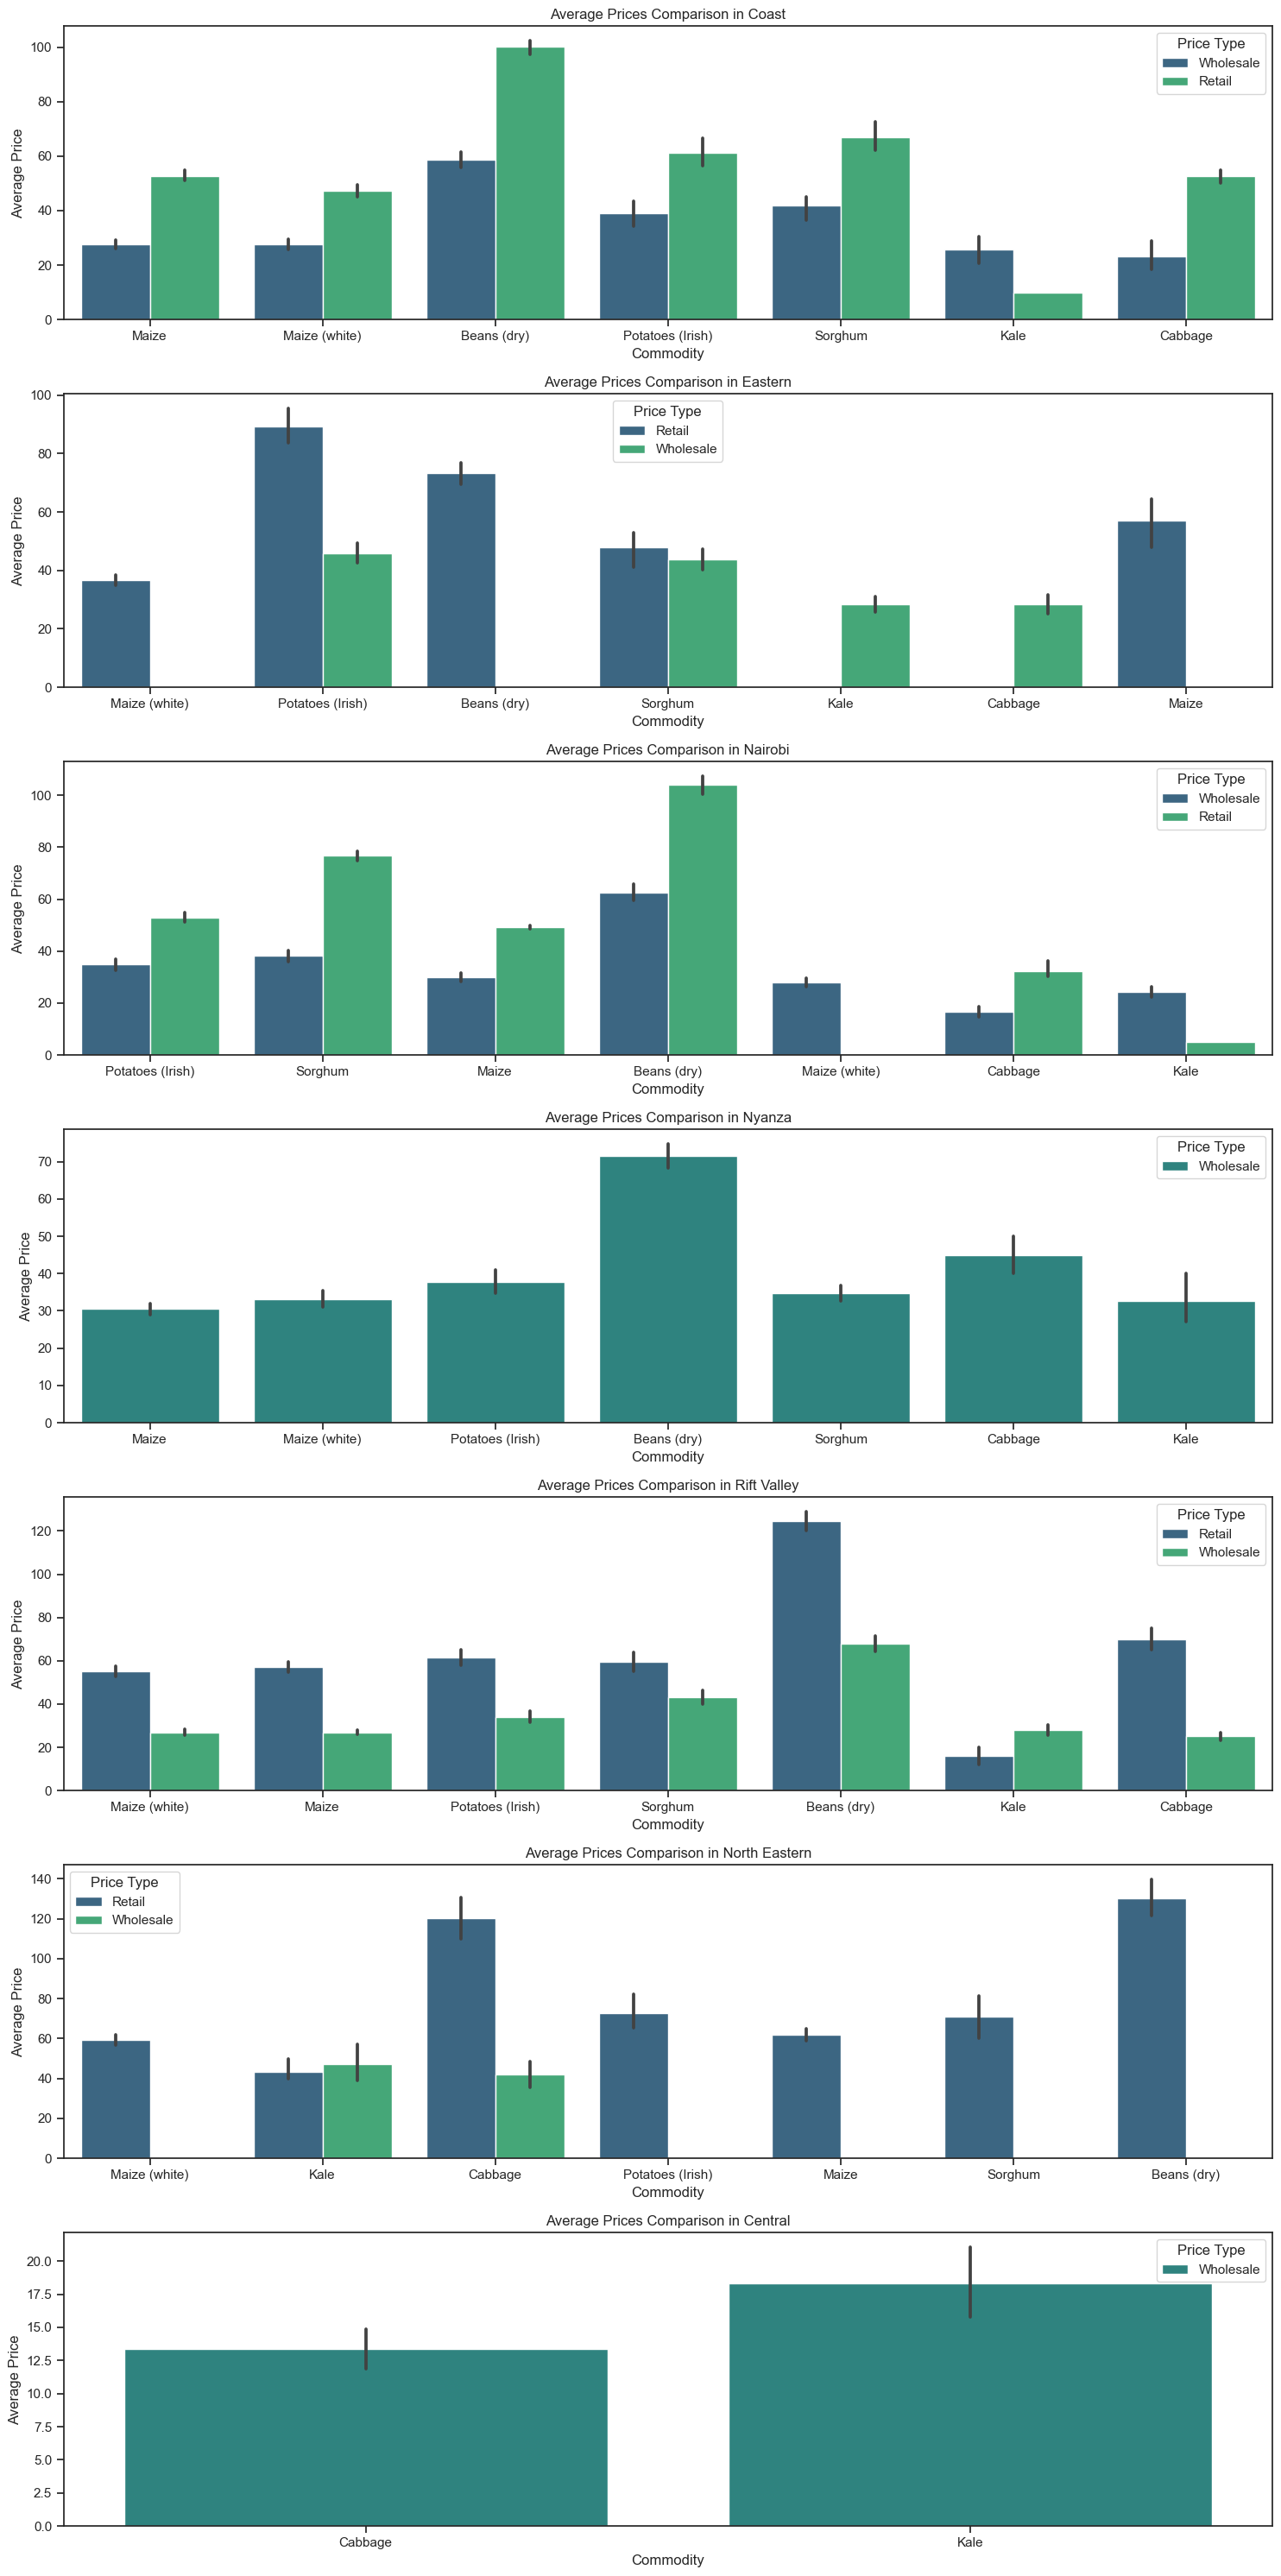

In [149]:
# Create subplots
fig, ax = plt.subplots(len(provinces_list), 1, figsize=(15, 30))

# Loop over provinces
for idx, province in enumerate(provinces_list):
    province_df = filtered_df[filtered_df['Provinces'] == province]

    # Plot average prices comparison
    sns.barplot(x='commodity', y='price_per_standard_unit', hue='pricetype', data=province_df, palette='viridis', ax=ax[idx])
    ax[idx].set_xlabel("Commodity")
    ax[idx].set_ylabel("Average Price")
    ax[idx].set_title(f"Average Prices Comparison in {province}")
    ax[idx].legend(title='Price Type')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The visualizations above show the price per standard unit differences in commodities sold in retail and wholesale in Provinces across the country. For some commodities, the prices available are only either Retail or wholesale. Some Provinces (Cental and Nyanza) have only one price type which is wholesale. This means that they tend to either buy only in wholesale or information on retail prices are not available.

In [150]:
# Group by 'province' and 'pricetype', then count the number of unique 'pricetype' for each 'province'
price_type_counts = df.groupby('Provinces')['pricetype'].nunique()

# Check provinces with only one unique 'pricetype'
provinces_with_single_price_type = price_type_counts[price_type_counts == 1].index.tolist()

print("Provinces with only one price type:", provinces_with_single_price_type)


Provinces with only one price type: ['Central', 'Nyanza']


In [151]:

# Identify top 10 selling commodities
top_10_commodities = df['commodity'].value_counts().nlargest(10).index.tolist()

# Filter DataFrame for top 10 commodities
filtered_df1 = df[df['commodity'].isin(top_10_commodities)]

# Calculate average price per commodity at each location
pivot_df = filtered_df1.pivot_table(index=['latitude', 'longitude'], columns='commodity', values='price_per_standard_unit', aggfunc='mean').reset_index()

# Replace NaN values with 0
pivot_df.fillna(0, inplace=True)

# Create a base map of Kenya using folium
kenya_map = folium.Map(location=[-0.0236, 37.9062], zoom_start=6)

# Define custom color gradient for commodities
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'darkblue', 'darkgreen']

# Loop through each commodity and add its heatmap layer to the base map
for idx, commodity in enumerate(top_10_commodities):
    color = colors[idx % len(colors)]  
    if commodity in pivot_df.columns:
        HeatMap(pivot_df[['latitude', 'longitude', commodity]].values.tolist(), 
                radius=15, 
                name=commodity, 
                gradient={0.0: color, 1.0: color}).add_to(kenya_map)
        
# Add LayerControl to toggle between different heatmaps
folium.LayerControl().add_to(kenya_map)

# Display the map
display(HTML(kenya_map._repr_html_()))

This visualization above is an interactive map that shows the heatmap of various commodities and in which areas or markets you are most likely to find them. The darker the color then the stronger the likelyhood of finding the commodity or the more readily available it is.

### 3.2 Market segmentations
This section deals with segmenting the markets in the countries to find out more information on sizes by number of commodities sold, and prices. Which one has on average the lowest and highest price per standar unit.

                                date      latitude     longitude  \
count                          10762  10762.000000  10762.000000   
mean   2018-11-13 20:31:07.905593600      0.064648     36.849636   
min              2006-01-15 00:00:00     -4.659730     34.727999   
25%              2016-01-15 00:00:00     -1.283333     35.076653   
50%              2021-04-15 00:00:00     -0.100000     36.783330   
75%              2022-01-15 00:00:00      1.253093     38.008250   
max              2024-03-15 00:00:00      3.936804     41.858383   
std                              NaN      2.242858      1.906625   

              price          year         month  standardized_unit  \
count  10762.000000  10762.000000  10762.000000       10762.000000   
mean    1820.983563   2018.407173      6.090597          30.823639   
min        5.000000   2006.000000      1.000000           0.200000   
25%       53.332500   2016.000000      3.000000           1.000000   
50%      139.100000   2021.000000    

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


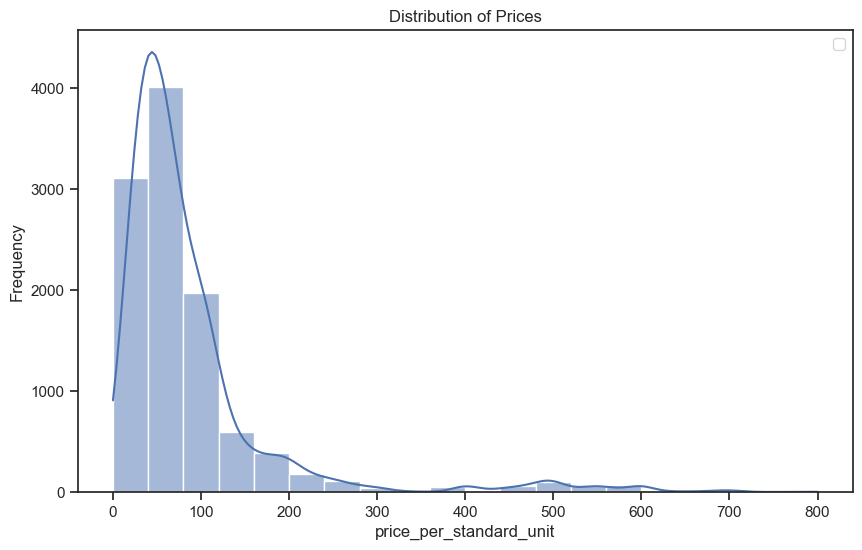

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


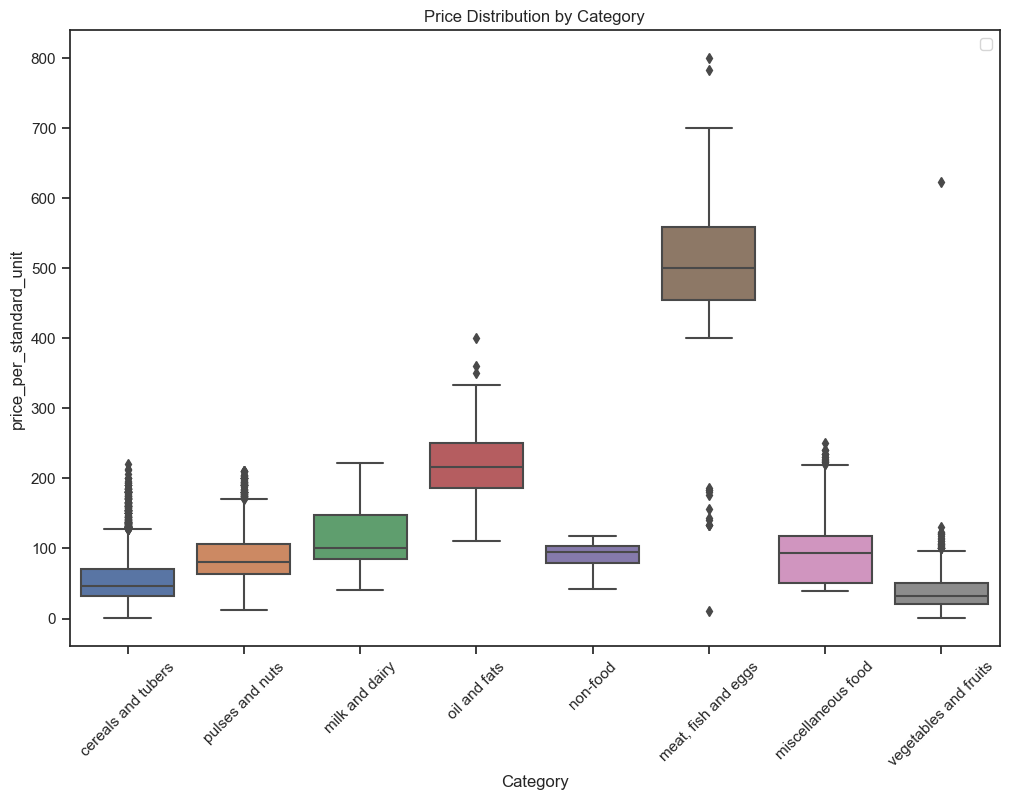

In [152]:
# Get summary statistics of numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())


# Visualize distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_standard_unit'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('price_per_standard_unit')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualize price distribution by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='price_per_standard_unit', data=df)
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('price_per_standard_unit')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Shows frequency distribution of the price per standard unit of all products and then breaks it down further to show the average distribution on average for each food category. From the visuallization we can clearly see that the meat, fish and eggs category has on average highest price per stand unit. It also has bigger range to account for items like meat(camel) which is has a price per standar unit at the highest end and fish(omena,dry) which has a price at the lower end of the distribution.

In [153]:
#splitting the data into wholesale and retail
wholesale_transactions = df[df['pricetype'] == 'Wholesale']
retail_transactions = df[df['pricetype'] == 'Retail']

In [154]:
# Calculate the price range for each commodity within each geographical segment
price_range = df.groupby(['Provinces', 'Counties', 'commodity'])['price_per_standard_unit'].agg(lambda x: x.max() - x.min()).reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_920\2379991303.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_commodities_data['Province_County'] = selected_commodities_data['Provinces'] + ' - ' + selected_commodities_data['Counties']
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

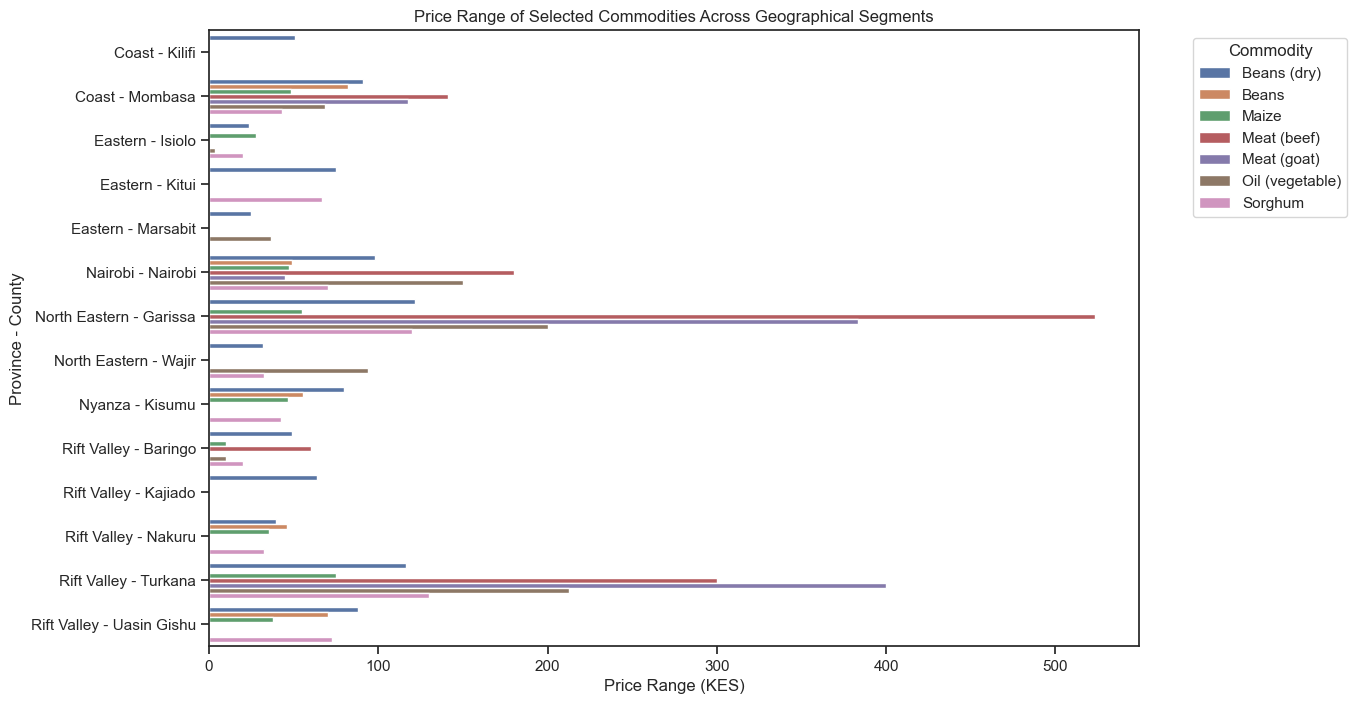

In [155]:
# Select the specific commodities
selected_commodities = ['Maize', 'Beans', 'Beans (dry)', 'Sorghum', 'Meat (beef)', 'Meat (goat)', 'Oil (vegetable)']

# Filter the price range data for the selected commodities
selected_commodities_data = price_range[price_range['commodity'].isin(selected_commodities)]

# Create a new column that concatenates provinces and counties
selected_commodities_data['Province_County'] = selected_commodities_data['Provinces'] + ' - ' + selected_commodities_data['Counties']

# Create a bar plot of price range for the selected commodities within each geographical segment
plt.figure(figsize=(12, 8))
sns.barplot(x='price_per_standard_unit', y='Province_County', hue='commodity', data=selected_commodities_data)
plt.title('Price Range of Selected Commodities Across Geographical Segments')
plt.xlabel('Price Range (KES)')
plt.ylabel('Province - County')
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The visualization above compares average price per unit for selected commodities across Provinces and Counties in the country. This shows the price variations of various commodities across different counties and provinces. From the plot above;

- Garissa - North Eastern has the highest prices for meat(beef) in the country. This is substantially more than any other region in the country.

- Turkana - Rift Valley has the highest prices for meat(goat) in the country.

- Baringo - Rift Valley has the lowest prices for Maize in the country.

In [156]:
# Grouping the data by provinces, counties, and pricetype and calculating the mean price per standardized unit
segmented_data = df.groupby(['Provinces', 'Counties', 'pricetype','market'])['price_per_standard_unit'].mean().reset_index()

# Displaying the segmented data
print(segmented_data)

      Provinces     Counties  pricetype                      market  \
0       Central        Nyeri  Wholesale            Karatina (Nyeri)   
1         Coast       Kilifi     Retail                      Kilifi   
2         Coast        Kwale  Wholesale               Vanga (Kwale)   
3         Coast      Mombasa     Retail        Bangladesh (Mombasa)   
4         Coast      Mombasa     Retail             Junda (Mombasa)   
..          ...          ...        ...                         ...   
62  Rift Valley      Turkana     Retail                 Lodwar town   
63  Rift Valley      Turkana     Retail          Mogadishu (Kakuma)   
64  Rift Valley  Uasin Gishu  Wholesale  Eldoret town (Uasin Gishu)   
65  Rift Valley   West Pokot  Wholesale          Lomut (West Pokot)   
66  Rift Valley   West Pokot  Wholesale       Makutano (West Pokot)   

    price_per_standard_unit  
0                 50.603630  
1                 71.809615  
2                 34.530000  
3                143.160667

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

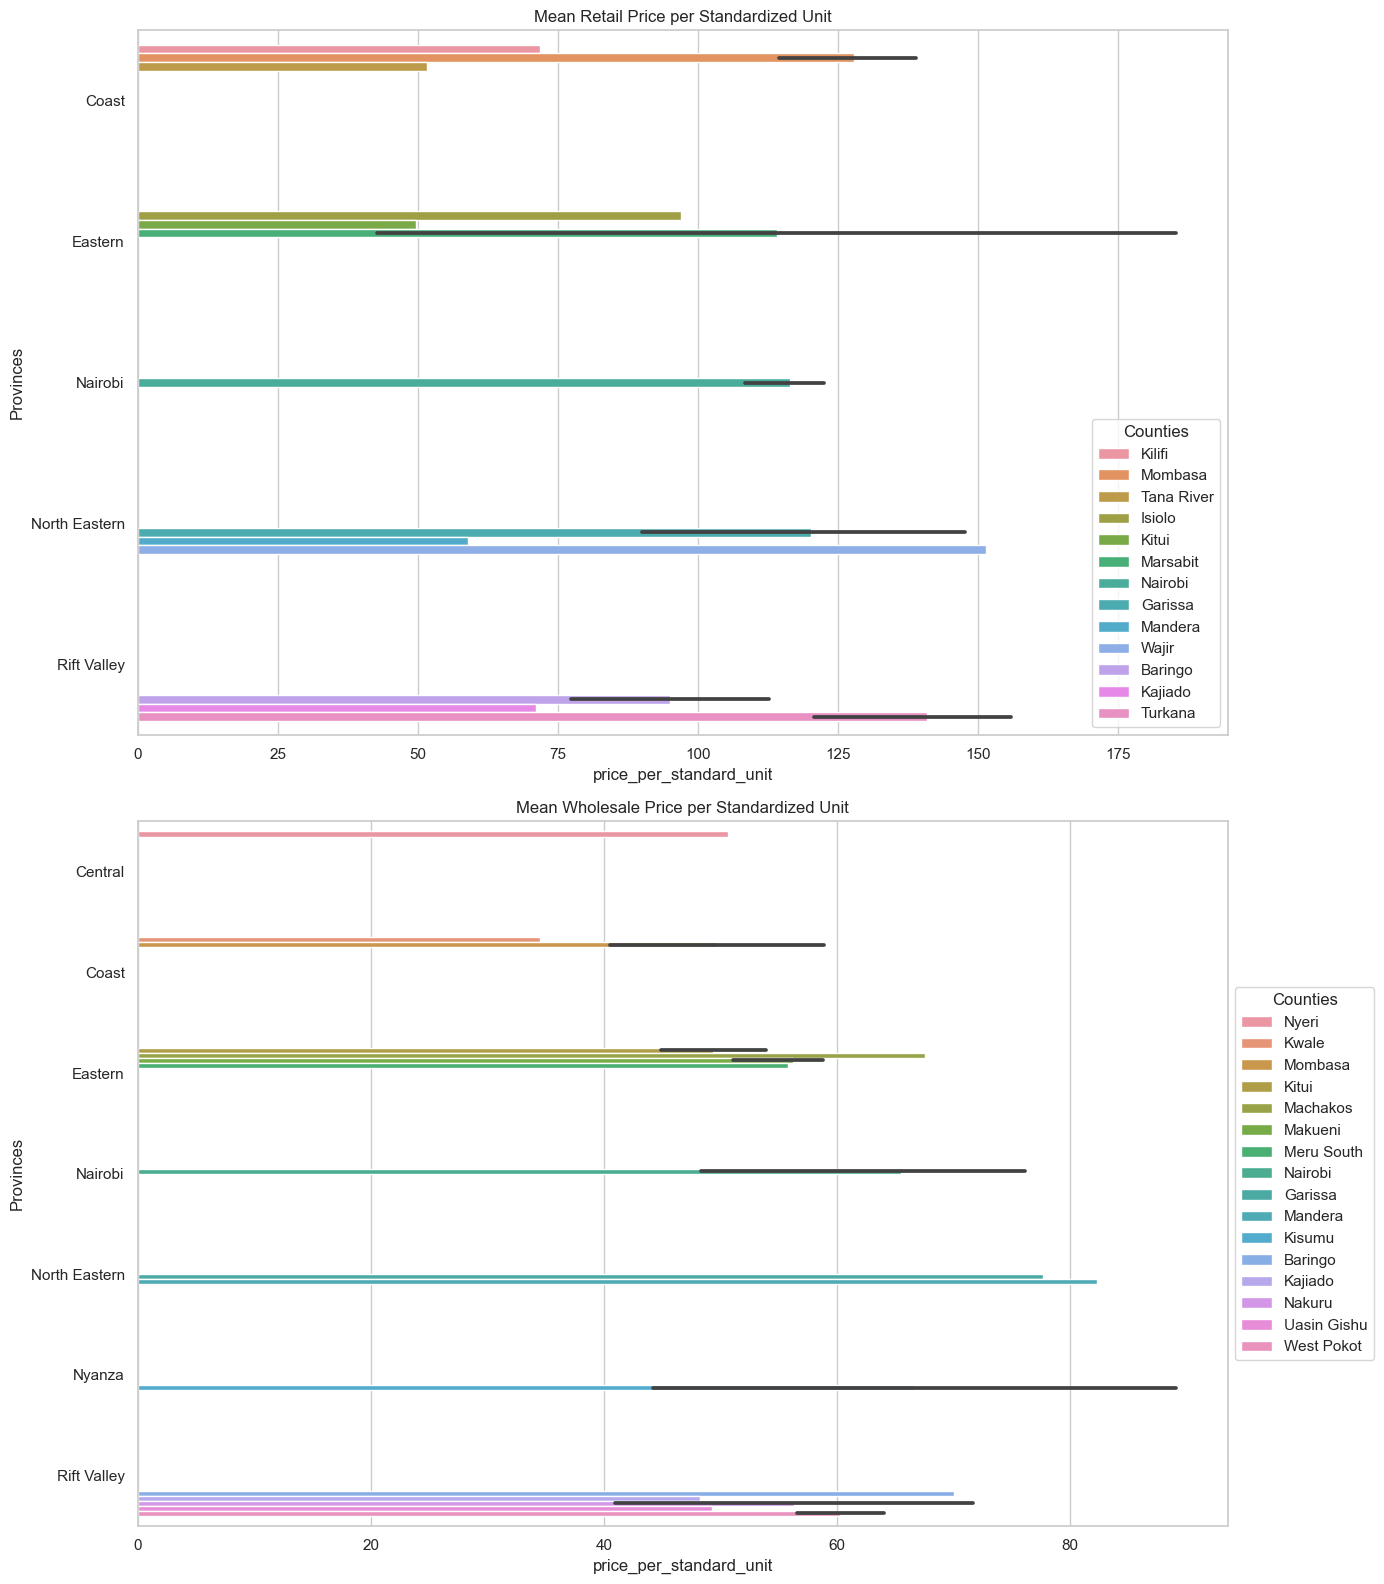

In [157]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 16))

# Plot for Retail prices
sns.barplot(data=segmented_data[segmented_data['pricetype'] == 'Retail'], 
            x='price_per_standard_unit', y='Provinces', hue='Counties', ax=axs[0])
axs[0].set_title('Mean Retail Price per Standardized Unit')

# Plot for Wholesale prices
sns.barplot(data=segmented_data[segmented_data['pricetype'] == 'Wholesale'], 
            x='price_per_standard_unit', y='Provinces', hue='Counties', ax=axs[1])
axs[1].set_title('Mean Wholesale Price per Standardized Unit')

# Add legend and adjust layout
plt.legend(title='Counties', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Show the plots
plt.show()


The visualizations above show the average price per standard unit of retail and wholsale for the Counties and Province in the country. North Easter province and the counties in that region have on average the highest retail and wholesale prices per standard unit. This may be due to the fact that getting commodities to the area is costly or the areas are a quite a distance away. 

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

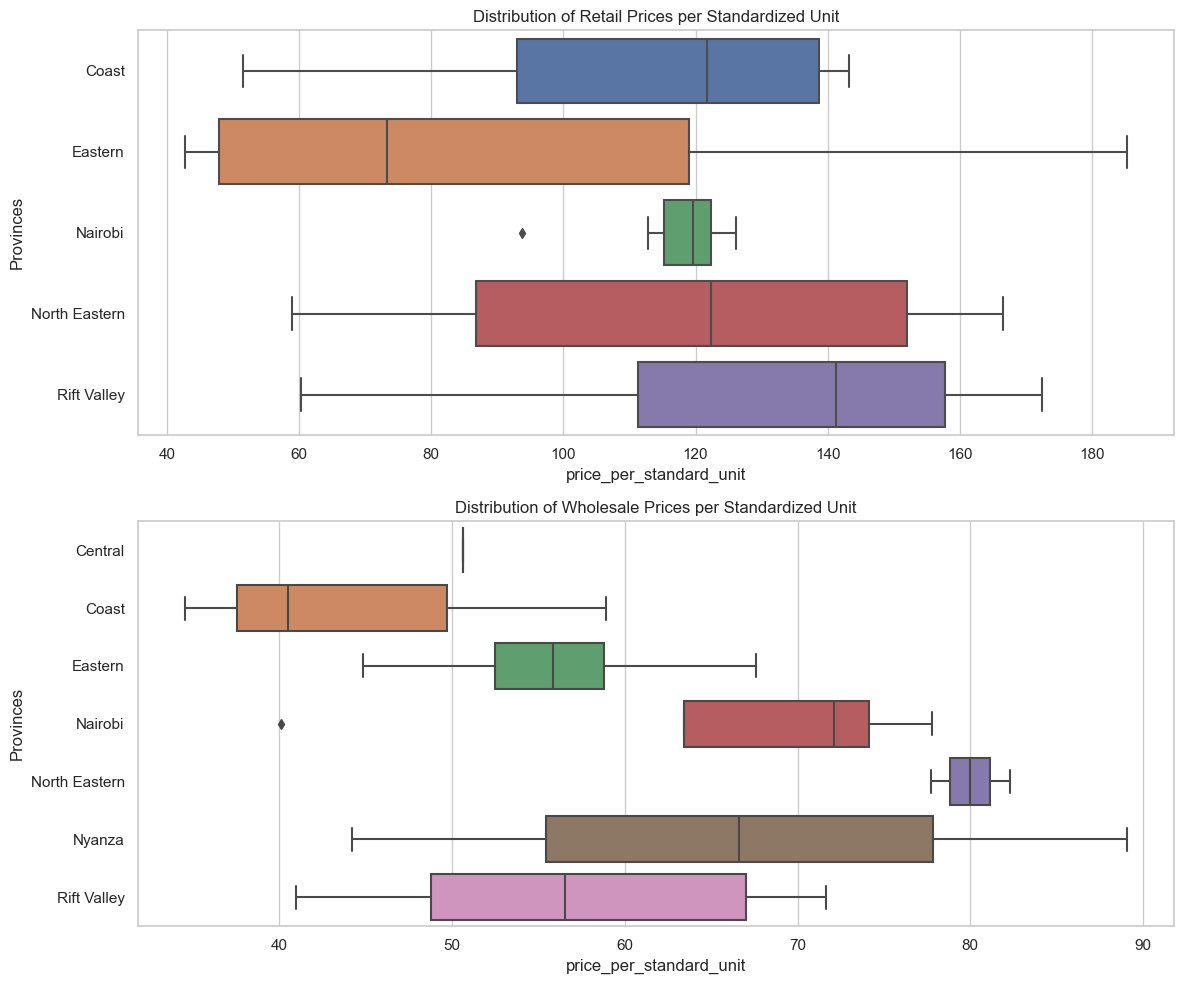

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Box plot for Retail prices
sns.boxplot(data=segmented_data[segmented_data['pricetype'] == 'Retail'], 
            x='price_per_standard_unit', y='Provinces', ax=axs[0])
axs[0].set_title('Distribution of Retail Prices per Standardized Unit')

# Box plot for Wholesale prices
sns.boxplot(data=segmented_data[segmented_data['pricetype'] == 'Wholesale'], 
            x='price_per_standard_unit', y='Provinces', ax=axs[1])
axs[1].set_title('Distribution of Wholesale Prices per Standardized Unit')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


The 2 sets of box plots above show the distribution of average retail and wholsale prices per province in the country. It can be observed than Easter Province has on average the lowest average retail prices at around 75ksh and Rift Valley Province has on average a retail price above 140ksh. Nairobi Province has on average a retail price of just under 120ksh. Whichis fairly decent

It can be observed that the wholesale prices are significantly lower than the Retail prices. Coast Province has on average the lowest wholesale prices at just over 40ksh and North Eastern has on average the highest wholesale price at around 80ksh. Nairobi Province has an average wholesale price of just above 70ksh. 

In [159]:
#grouping market by market
market_data = segmented_data.groupby('market')

# Display the grouped data
for market, group in market_data:
    print("Market:", market)
    print(group)
    print()

Market: Bangladesh (Mombasa)
  Provinces Counties pricetype                market  price_per_standard_unit
3     Coast  Mombasa    Retail  Bangladesh (Mombasa)               143.160667

Market: Dadaab town
        Provinces Counties pricetype       market  price_per_standard_unit
34  North Eastern  Garissa    Retail  Dadaab town                 129.6875

Market: Dagahaley (Daadab)
        Provinces Counties pricetype              market  \
35  North Eastern  Garissa    Retail  Dagahaley (Daadab)   

    price_per_standard_unit  
35               115.140405  

Market: Dandora (Nairobi)
   Provinces Counties pricetype             market  price_per_standard_unit
23   Nairobi  Nairobi    Retail  Dandora (Nairobi)               126.117321

Market: Eldoret town (Uasin Gishu)
      Provinces     Counties  pricetype                      market  \
64  Rift Valley  Uasin Gishu  Wholesale  Eldoret town (Uasin Gishu)   

    price_per_standard_unit  
64                49.281719  

Market: Ethiopia

Mean Prices per Standardized Unit (Sorted):
               market  price_per_standard_unit
57      Vanga (Kwale)                34.530000
49            Mombasa                40.517257
53             Nakuru                40.959502
45           Marsabit                42.748235
31             Kisumu                44.203780
..                ...                      ...
5   Ethiopia (Kakuma)               162.442704
19           Kakuma 4               162.764712
11       IFO (Daadab)               166.456400
18           Kakuma 3               172.361767
46      Marsabit town               185.268302

[62 rows x 2 columns]

Competitiveness Assessment:
Lowest Mean Price per Standardized Unit: 34.53
Highest Mean Price per Standardized Unit: 185.26830188679244
Price Difference between Lowest and Highest: 150.73830188679244


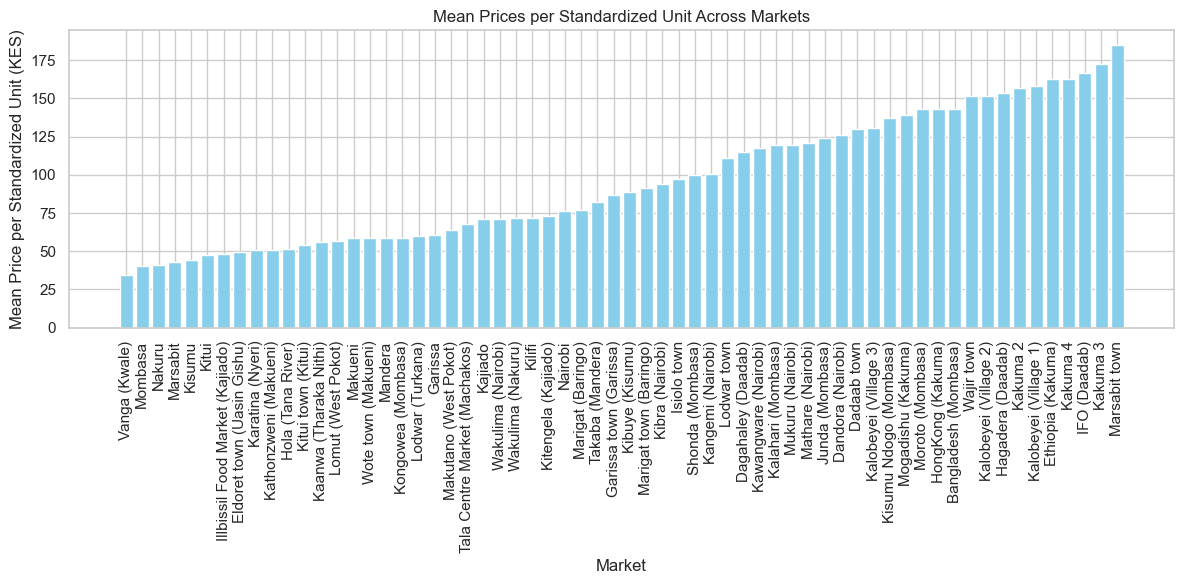

In [160]:
# Calculate mean prices per standardized unit across different markets
mean_prices = segmented_data.groupby('market')['price_per_standard_unit'].mean().reset_index()

# Sort the mean prices in ascending order
mean_prices_sorted = mean_prices.sort_values(by='price_per_standard_unit')

# Display the sorted mean prices
print("Mean Prices per Standardized Unit (Sorted):")
print(mean_prices_sorted)

# Assess competitiveness based on price levels
lowest_price = mean_prices_sorted.iloc[0]['price_per_standard_unit']
highest_price = mean_prices_sorted.iloc[-1]['price_per_standard_unit']
price_difference = highest_price - lowest_price

print("\nCompetitiveness Assessment:")
print("Lowest Mean Price per Standardized Unit:", lowest_price)
print("Highest Mean Price per Standardized Unit:", highest_price)
print("Price Difference between Lowest and Highest:", price_difference)


# Sort the mean prices in ascending order
mean_prices_sorted = mean_prices.sort_values(by='price_per_standard_unit')

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(mean_prices_sorted['market'], mean_prices_sorted['price_per_standard_unit'], color='skyblue')
plt.xlabel('Market')
plt.ylabel('Mean Price per Standardized Unit (KES)')
plt.title('Mean Prices per Standardized Unit Across Markets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()



The visualization above shows the average price per standard unit of markets across the country. This visualizationshows that Vanga market in Kwale has on average the lowest prices the followed by Mombasa and Nakuru markets. The most expensive markets in the country are Marsabit town market(most expensive), Kakuma 3 and IFO (Daadab)

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


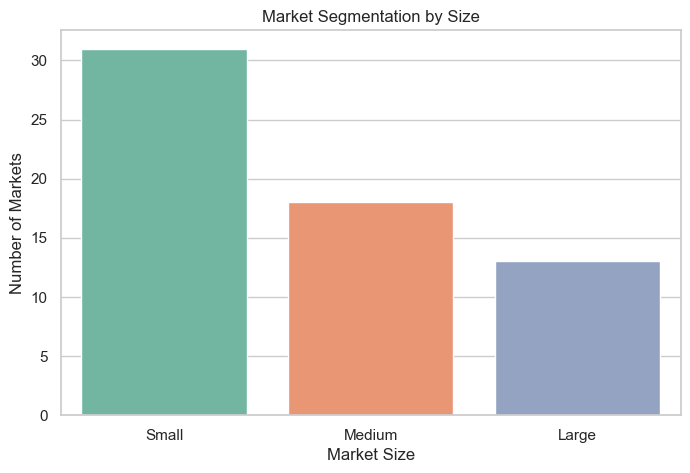

In [161]:
#grouping by market and taking price per standar unit figures
market_size = segmented_data.groupby('market')['price_per_standard_unit'].sum().reset_index()

# Determine segment thresholds (e.g., based on percentiles)
large_threshold = market_size['price_per_standard_unit'].quantile(0.8)
medium_threshold = market_size['price_per_standard_unit'].quantile(0.5)

# Assign market segments based on thresholds
market_size['segment'] = pd.cut(market_size['price_per_standard_unit'], bins=[0, medium_threshold, large_threshold, float('inf')],
                                labels=['Small', 'Medium', 'Large'])

# Visualize market segments
plt.figure(figsize=(8, 5))
sns.countplot(data=market_size, x='segment', palette='Set2')
plt.xlabel('Market Size')
plt.ylabel('Number of Markets')
plt.title('Market Segmentation by Size')
plt.show()


Based on the splitting or segmentation of markets by these are the results. It can be noted that most of the markets fall under the small category and the large category has the least number as to be expected.

In [162]:
# Filter markets by segment
large_markets = market_size[market_size['segment'] == 'Large']
medium_markets = market_size[market_size['segment'] == 'Medium']
small_markets = market_size[market_size['segment'] == 'Small']

# Display markets in each category
print("Large Markets:")
print(large_markets)

print("\nMedium Markets:")
print(medium_markets)

print("\nSmall Markets:")
print(small_markets)

Large Markets:
                    market  price_per_standard_unit segment
5        Ethiopia (Kakuma)               162.442704   Large
7   Garissa town (Garissa)               173.199908   Large
8        Hagadera (Daadab)               153.791475   Large
11            IFO (Daadab)               166.456400   Large
17                Kakuma 2               156.538981   Large
18                Kakuma 3               172.361767   Large
19                Kakuma 4               162.764712   Large
21   Kalobeyei (Village 1)               158.088261   Large
22   Kalobeyei (Village 2)               151.885341   Large
24       Kangemi (Nairobi)               201.388017   Large
44  Marigat town (Baringo)               182.697543   Large
46           Marsabit town               185.268302   Large
52                 Nairobi               152.944632   Large

Medium Markets:
                    market  price_per_standard_unit segment
0     Bangladesh (Mombasa)               143.160667  Medium
1       

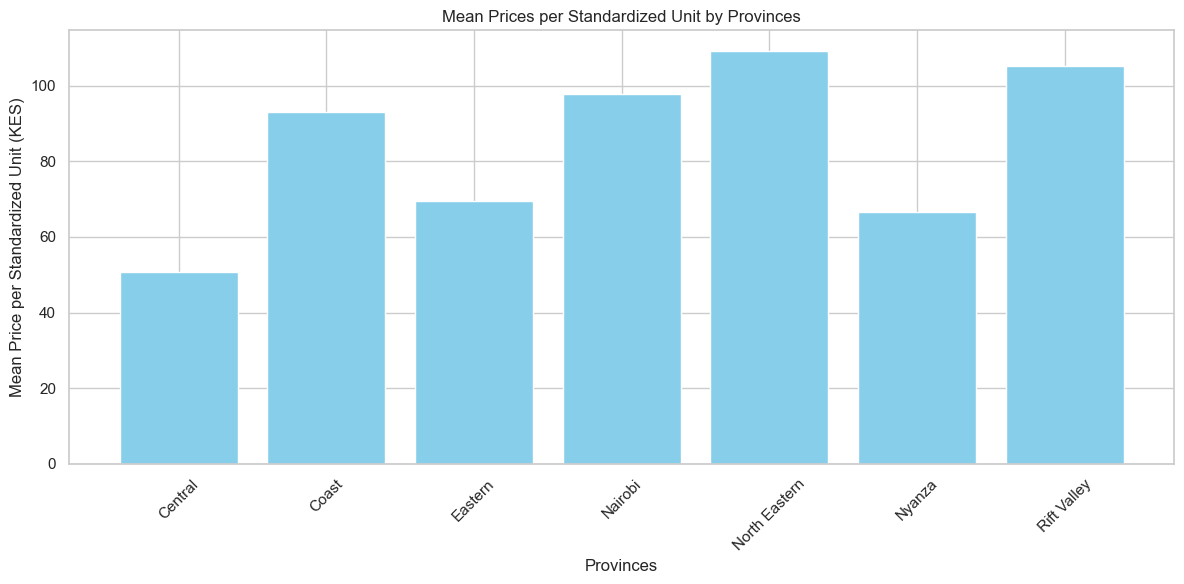

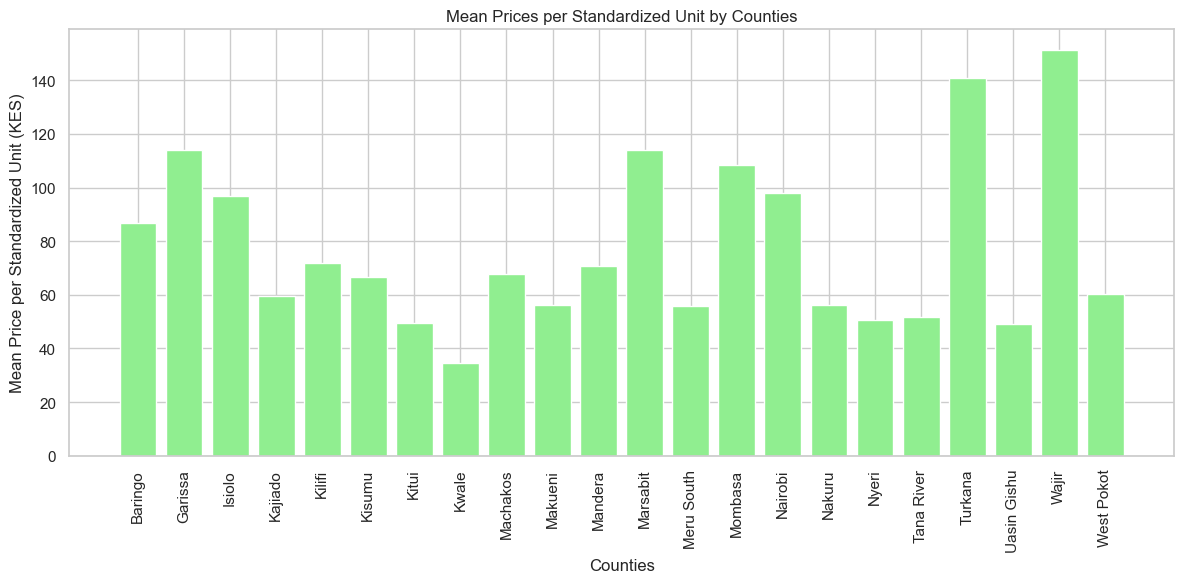

In [163]:
# Segment the data by provinces or counties
province_segmentation = segmented_data.groupby('Provinces')['price_per_standard_unit'].mean().reset_index()
county_segmentation = segmented_data.groupby('Counties')['price_per_standard_unit'].mean().reset_index()

# Visualize segmentation by provinces
plt.figure(figsize=(12, 6))
plt.bar(province_segmentation['Provinces'], province_segmentation['price_per_standard_unit'], color='skyblue')
plt.xlabel('Provinces')
plt.ylabel('Mean Price per Standardized Unit (KES)')
plt.title('Mean Prices per Standardized Unit by Provinces')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize segmentation by counties
plt.figure(figsize=(12, 6))
plt.bar(county_segmentation['Counties'], county_segmentation['price_per_standard_unit'], color='lightgreen')
plt.xlabel('Counties')
plt.ylabel('Mean Price per Standardized Unit (KES)')
plt.title('Mean Prices per Standardized Unit by Counties')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The visualiations above show the mean prices per standard unit for commodities in counties and Provinces. It can be noted that;

- Central Province has on average the lowest average price per standard unit followed by Eastern and Nyanza Provinces. North Easter Province has on average the highest average price per standard unit.

- Kwale County has the lowest average price per standard unit. Wajir and Turkana have on average the highest prices per standard unit.



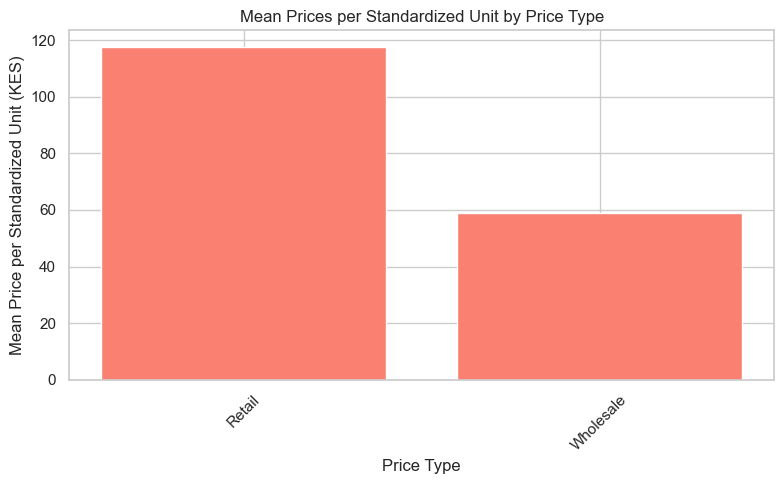

In [164]:
# Segment the data by price type
price_type_segmentation = segmented_data.groupby('pricetype')['price_per_standard_unit'].mean().reset_index()

# Visualize segmentation by price type
plt.figure(figsize=(8, 5))
plt.bar(price_type_segmentation['pricetype'], price_type_segmentation['price_per_standard_unit'], color='salmon')
plt.xlabel('Price Type')
plt.ylabel('Mean Price per Standardized Unit (KES)')
plt.title('Mean Prices per Standardized Unit by Price Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The visualization above shows that mean prices per standard unit for both Retail and Wholsale. This visualization shows that on averaget Wholesale is half the Retail price.

The next set of cells segment the data further using KMeans algorithm

In [165]:
# Select the categorical columns for one-hot encoding
categorical_cols = ['Provinces', 'Counties', 'pricetype', 'market']

# Select the numerical columns for standardization
numeric_cols = ['price_per_standard_unit']

# Define the column transformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Standardize numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ],
    remainder='passthrough'  # Pass through any other columns
)

# Apply transformations
transformed_data = preprocessor.fit_transform(segmented_data)

# Perform clustering on the transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(transformed_data)

# Add cluster labels to the original segmented data
segmented_data['Cluster'] = cluster_labels

# View the clustered data
print("Clustered Data:")
print(segmented_data)


Clustered Data:
      Provinces     Counties  pricetype                      market  \
0       Central        Nyeri  Wholesale            Karatina (Nyeri)   
1         Coast       Kilifi     Retail                      Kilifi   
2         Coast        Kwale  Wholesale               Vanga (Kwale)   
3         Coast      Mombasa     Retail        Bangladesh (Mombasa)   
4         Coast      Mombasa     Retail             Junda (Mombasa)   
..          ...          ...        ...                         ...   
62  Rift Valley      Turkana     Retail                 Lodwar town   
63  Rift Valley      Turkana     Retail          Mogadishu (Kakuma)   
64  Rift Valley  Uasin Gishu  Wholesale  Eldoret town (Uasin Gishu)   
65  Rift Valley   West Pokot  Wholesale          Lomut (West Pokot)   
66  Rift Valley   West Pokot  Wholesale       Makutano (West Pokot)   

    price_per_standard_unit  Cluster  
0                 50.603630        1  
1                 71.809615        0  
2             

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

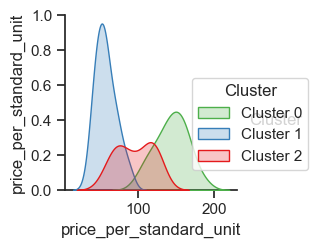

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


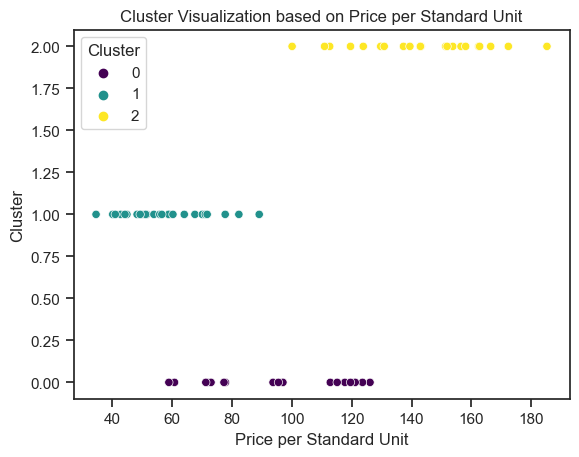

In [166]:
# Set style
sns.set(style="ticks")

# Plot pairplot with hue as Cluster
pairplot = sns.pairplot(segmented_data, hue='Cluster', palette='Set1')

# Manually set legend labels
pairplot.fig.legend(labels=['Cluster 0', 'Cluster 1', 'Cluster 2'], title='Cluster', loc='center right')

plt.show()

# Plot the clusters
sns.scatterplot(data=segmented_data, x='price_per_standard_unit', y='Cluster', hue='Cluster', palette='viridis')
plt.title('Cluster Visualization based on Price per Standard Unit')
plt.xlabel('Price per Standard Unit')
plt.ylabel('Cluster')
plt.show()


From the visualization on the results of clustering, the clustering distributions can be seen above. Cluster 1 contains the lowest price per standard unit values, Cluster 2 contains the highest price per standard unit values and Cluster 0 contains values in the middle of cluster 1 and cluster 2.

In [167]:
# Group data by cluster
cluster_groups = segmented_data.groupby('Cluster')

# Aggregate statistics for numerical features
cluster_stats = cluster_groups.describe()

# Display cluster statistics
print("Cluster Statistics for Numerical Features:")
print(cluster_stats['price_per_standard_unit'])
print()

# Frequency distribution for categorical features
categorical_features = ['Provinces', 'Counties', 'pricetype', 'market']
for feature in categorical_features:
    feature_distribution = cluster_groups[feature].value_counts(normalize=True).unstack()
    print(f"Frequency distribution for {feature}:")
    print(feature_distribution)
    print()



Cluster Statistics for Numerical Features:
         count        mean        std         min         25%         50%  \
Cluster                                                                     
0         17.0   94.887608  23.714087   58.879340   72.963444   95.499079   
1         28.0   56.596045  13.606323   34.530000   47.401224   54.844897   
2         22.0  143.382613  21.513317  100.068654  129.981675  143.067228   

                75%         max  
Cluster                          
0        117.707107  126.117321  
1         64.912252   89.072327  
2        157.700941  185.268302  

Frequency distribution for Provinces:
Provinces   Central     Coast   Eastern   Nairobi  North Eastern    Nyanza  \
Cluster                                                                      
0               NaN  0.058824  0.058824  0.588235       0.235294       NaN   
1          0.035714  0.142857  0.321429  0.035714       0.071429  0.071429   
2               NaN  0.272727  0.045455       NaN 

Cluster 0 represents markets with moderately high prices, primarily located in Nairobi.
Cluster 1 comprises markets with lower to moderate prices, distributed across various provinces.
Cluster 2 consists of markets with premium prices, particularly located in Rift Valley and Coast regions.

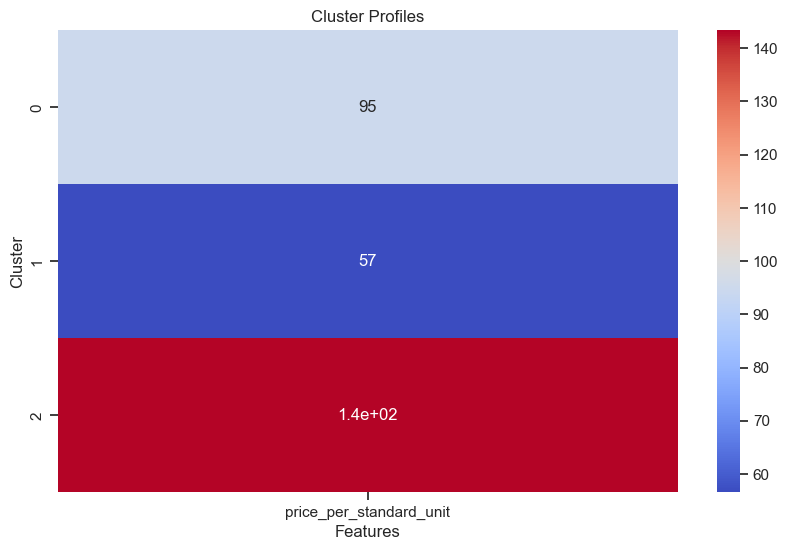

In [168]:
# Select numeric columns for cluster profiling
numeric_cols = ['price_per_standard_unit']

# Calculate cluster means
cluster_means = segmented_data.groupby('Cluster')[numeric_cols].mean()

# Visualize cluster profiles
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm')
plt.title('Cluster Profiles')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

The heat map above shows the following information;

- Cluster 2 has highest average prices per standard unit
- Cluster 0 has medium average prices per standard unit
- Cluster 1 has lowest average prices per standard unit

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


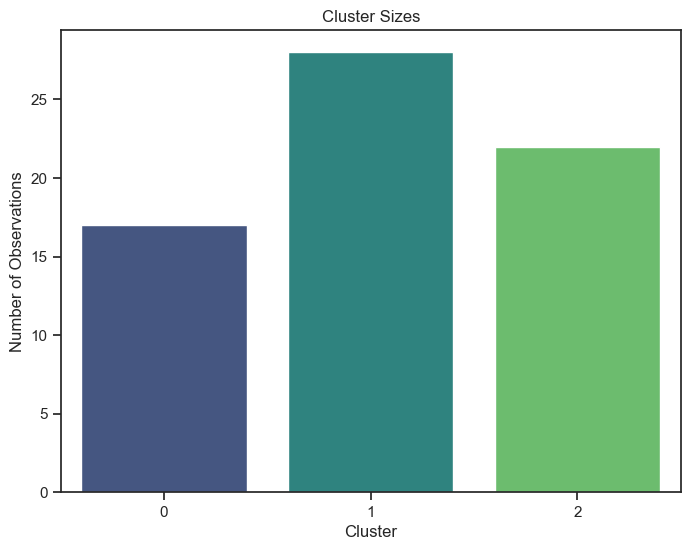

In [169]:
# Count observations per cluster
cluster_sizes = segmented_data['Cluster'].value_counts()

# Visualize cluster sizes
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.show()


The visualization above shows that cluster 1 has the most observations with more than 25, followed by cluster 2 with slightly more than 20 observations and the cluster 0 with slighly more than 15 observations.

In [170]:
# Calculate coefficient of variation for cluster sizes
import numpy as np
cluster_sizes = segmented_data['Cluster'].value_counts()
cv = np.std(cluster_sizes) / np.mean(cluster_sizes)

print("Coefficient of Variation (CV) for Cluster Sizes:", cv)

Coefficient of Variation (CV) for Cluster Sizes: 0.2013542919885379


In [171]:
# Group the data by cluster and concatenate the markets within each cluster
clustered_markets = segmented_data.groupby('Cluster')['market'].apply(list)

# Print the markets in each cluster
for cluster, markets in clustered_markets.items():
    print(f"Cluster {cluster} Markets:")
    for market in markets:
        print(market)
    print()

Cluster 0 Markets:
Kilifi
Isiolo town
Dandora (Nairobi)
Kangemi (Nairobi)
Kawangware (Nairobi)
Kibra (Nairobi)
Mathare (Nairobi)
Mukuru (Nairobi)
Nairobi
Kangemi (Nairobi)
Kitengela (Kajiado)
Wakulima (Nairobi)
Dagahaley (Daadab)
Garissa
Garissa town (Garissa)
Mandera
Marigat (Baringo)

Cluster 1 Markets:
Karatina (Nyeri)
Vanga (Kwale)
Kongowea (Mombasa)
Mombasa
Hola (Tana River)
Kitui
Kitui
Kitui town (Kitui)
Tala Centre Market (Machakos)
Kathonzweni (Makueni)
Makueni
Wote town (Makueni)
Marsabit
Kaanwa (Tharaka Nithi)
Nairobi
Garissa town (Garissa)
Takaba (Mandera)
Kibuye (Kisumu)
Kisumu
Marigat town (Baringo)
Kajiado
Illbissil Food Market (Kajiado)
Nakuru
Wakulima (Nakuru)
Lodwar (Turkana)
Eldoret town (Uasin Gishu)
Lomut (West Pokot)
Makutano (West Pokot)

Cluster 2 Markets:
Bangladesh (Mombasa)
Junda (Mombasa)
Kalahari (Mombasa)
Kisumu Ndogo (Mombasa)
Moroto (Mombasa)
Shonda (Mombasa)
Marsabit town
Dadaab town
Hagadera (Daadab)
IFO (Daadab)
Wajir town
Marigat town (Baringo)
Ethiop

The output of the cell above shows the breakdown of the markets in each cluster.

In [172]:
# Top Markets by Market Size
top_markets_by_size = segmented_data.groupby('Cluster').apply(lambda x: x.nlargest(10, 'price_per_standard_unit'))

# Lowest Prices
lowest_prices = segmented_data.groupby('Cluster').apply(lambda x: x.nsmallest(10, 'price_per_standard_unit'))

# Highest Prices
highest_prices = segmented_data.groupby('Cluster').apply(lambda x: x.nlargest(10, 'price_per_standard_unit'))

# Top Provinces and Counties
top_provinces = segmented_data.groupby(['Cluster', 'Provinces']).size().reset_index(name='Count').sort_values(by=['Cluster', 'Count'], ascending=[True, False]).groupby('Cluster').head(3)
top_counties = segmented_data.groupby(['Cluster', 'Counties']).size().reset_index(name='Count').sort_values(by=['Cluster', 'Count'], ascending=[True, False]).groupby('Cluster').head(3)

# Display results
print("Top Markets by Market Size:")
#print(top_markets_by_size.head())
top_markets_by_size.head()
print()




Top Markets by Market Size:



In [173]:
print("Markets with Lowest Prices:")
print(lowest_prices)
print()



Markets with Lowest Prices:
                Provinces     Counties  pricetype  \
Cluster                                             
0       41  North Eastern      Mandera     Retail   
        36  North Eastern      Garissa     Retail   
        33        Nairobi      Nairobi  Wholesale   
        1           Coast       Kilifi     Retail   
        31        Nairobi      Nairobi  Wholesale   
        46    Rift Valley      Baringo     Retail   
        30        Nairobi      Nairobi  Wholesale   
        26        Nairobi      Nairobi     Retail   
        37  North Eastern      Garissa     Retail   
        12        Eastern       Isiolo     Retail   
1       2           Coast        Kwale  Wholesale   
        32        Nairobi      Nairobi  Wholesale   
        10          Coast      Mombasa  Wholesale   
        51    Rift Valley       Nakuru  Wholesale   
        20        Eastern     Marsabit     Retail   
        45         Nyanza       Kisumu  Wholesale   
        14        

In [174]:
print("Markets with Highest Prices:")
print(highest_prices)
print()



Markets with Highest Prices:
                Provinces    Counties  pricetype  \
Cluster                                            
0       23        Nairobi     Nairobi     Retail   
        24        Nairobi     Nairobi     Retail   
        27        Nairobi     Nairobi     Retail   
        28        Nairobi     Nairobi     Retail   
        25        Nairobi     Nairobi     Retail   
        35  North Eastern     Garissa     Retail   
        29        Nairobi     Nairobi     Retail   
        12        Eastern      Isiolo     Retail   
        37  North Eastern     Garissa     Retail   
        26        Nairobi     Nairobi     Retail   
1       44         Nyanza      Kisumu  Wholesale   
        42  North Eastern     Mandera  Wholesale   
        40  North Eastern     Garissa  Wholesale   
        52    Rift Valley      Nakuru  Wholesale   
        49    Rift Valley     Kajiado     Retail   
        48    Rift Valley     Baringo  Wholesale   
        16        Eastern    Machak

In [175]:
print("Top Provinces within Each Cluster:")
print(top_provinces)
print()



Top Provinces within Each Cluster:
    Cluster      Provinces  Count
2         0        Nairobi     10
3         0  North Eastern      4
0         0          Coast      1
7         1        Eastern      9
11        1    Rift Valley      9
6         1          Coast      4
15        2    Rift Valley     11
12        2          Coast      6
14        2  North Eastern      4



The cell above gives the brief breakdown of how many times each province appears in a cluster. 
- Eastern Province has the most markets in cluster 1(lowest priced ones)
- Nairobi Province has the most markets in cluster 0(medium priced ones)
- Rift Valley has the most marjets in cluster 2 (highest priced ones)


In [176]:
print("Top Counties within Each Cluster:")
print(top_counties)

Top Counties within Each Cluster:
    Cluster Counties  Count
5         0  Nairobi     10
1         0  Garissa      3
0         0  Baringo      1
10        1    Kitui      3
13        1  Makueni      3
8         1  Kajiado      2
29        2  Turkana     10
28        2  Mombasa      6
26        2  Garissa      3


The cell above gives the brief breakdown of how many times each county appears in a cluster. 
- Kitui and Makueni have the most markets in cluster 1(lowest priced ones)
- Nairobi County has the most markets in cluster 0(medium priced ones)
- Turkana County has the most marjets in cluster 2 (highest priced ones)


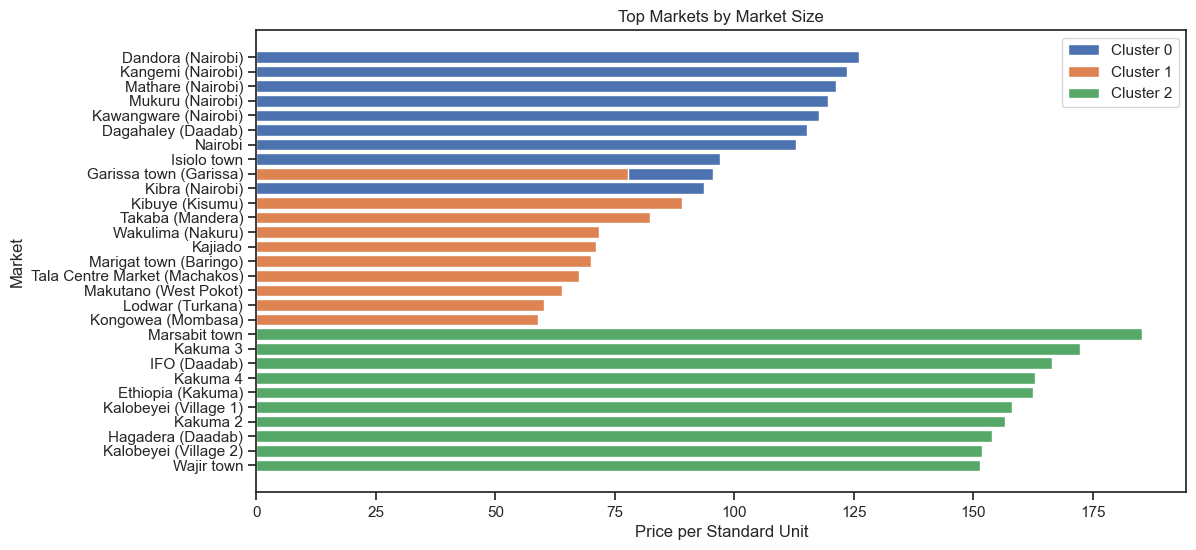

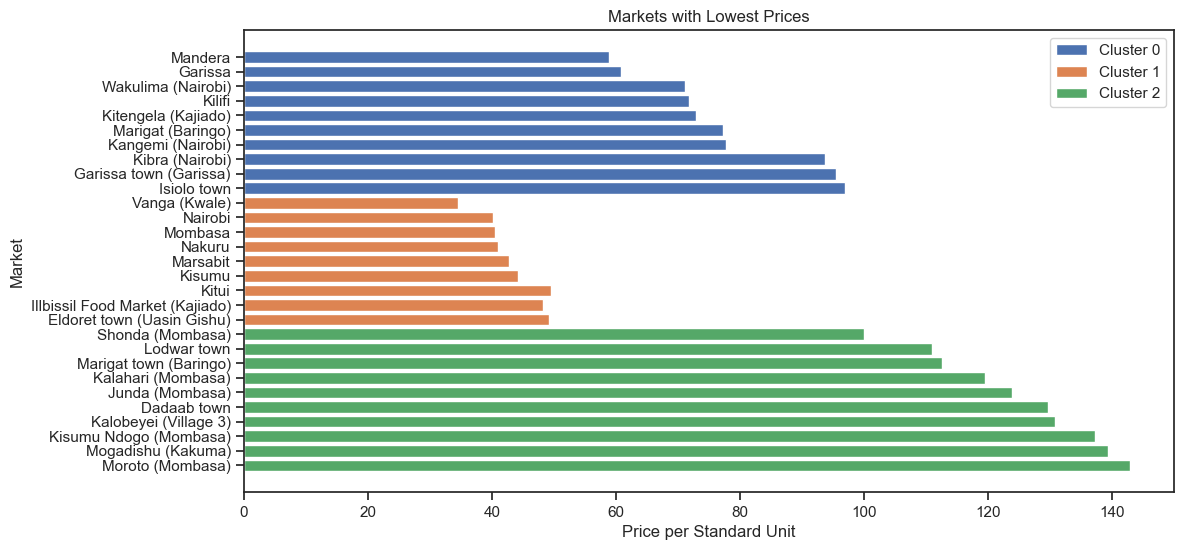

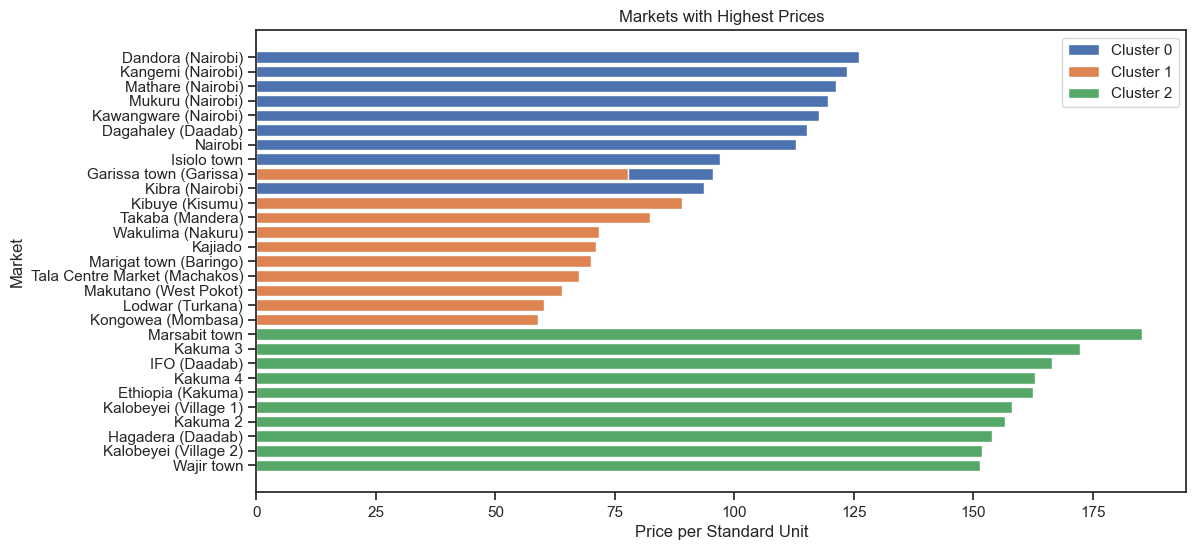

In [177]:
# Visualize top markets by market size
plt.figure(figsize=(12, 6))
for cluster in top_markets_by_size.index.get_level_values('Cluster').unique():
    cluster_data = top_markets_by_size.loc[cluster]
    plt.barh(cluster_data['market'], cluster_data['price_per_standard_unit'], label=f'Cluster {cluster}')

plt.xlabel('Price per Standard Unit')
plt.ylabel('Market')
plt.title('Top Markets by Market Size')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

# Visualize markets with lowest prices
plt.figure(figsize=(12, 6))
for cluster in lowest_prices.index.get_level_values('Cluster').unique():
    cluster_data = lowest_prices.loc[cluster]
    plt.barh(cluster_data['market'], cluster_data['price_per_standard_unit'], label=f'Cluster {cluster}')

plt.xlabel('Price per Standard Unit')
plt.ylabel('Market')
plt.title('Markets with Lowest Prices')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

# Visualize markets with highest prices
plt.figure(figsize=(12, 6))
for cluster in highest_prices.index.get_level_values('Cluster').unique():
    cluster_data = highest_prices.loc[cluster]
    plt.barh(cluster_data['market'], cluster_data['price_per_standard_unit'], label=f'Cluster {cluster}')

plt.xlabel('Price per Standard Unit')
plt.ylabel('Market')
plt.title('Markets with Highest Prices')
plt.legend()
plt.gca().invert_yaxis()
plt.show()






## 4. <b>Modelling</b>

This section is going to be dealing with the process of making a system that predicts future prices for wholesale commodities in the country. This is to be used in effective decision making and will offer and advantage to the stakeholder in future planning.

### 4.1 Preparing the data for modelling

This involves additional processing and dropping of features that may not be benefitial or needed in this stage.

In [178]:
# splitting the dataset into wholesale items only
wholesale_df = df[df['pricetype'] == 'Wholesale']
wholesale_df.head()

,date,Provinces,Counties,market,latitude,longitude,category,commodity,unit,pricetype,currency,price,year,month,standardized_unit,price_per_standard_unit
1,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,Wholesale,KES,16.13,2006,1,1.0,16.13
2,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,Wholesale,KES,33.63,2006,1,1.0,33.63
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,Wholesale,KES,1249.99,2006,1,50.0,25.00
5,2006-01-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,cereals and tubers,Potatoes (Irish),50 KG,Wholesale,KES,664.43,2006,1,50.0,13.29
6,2006-01-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,cereals and tubers,Sorghum,90 KG,Wholesale,KES,1960.00,2006,1,90.0,21.78


In [179]:
#dropping columns that are not needed
wholesale_df.drop(['currency', 'price', 'standardized_unit'], axis=1, inplace=True)
wholesale_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_920\177805629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_df.drop(['currency', 'price', 'standardized_unit'], axis=1, inplace=True)


,date,Provinces,Counties,market,latitude,longitude,category,commodity,unit,pricetype,year,month,price_per_standard_unit
1,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,Wholesale,2006,1,16.13
2,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,Wholesale,2006,1,33.63
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,Wholesale,2006,1,25.00
5,2006-01-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,cereals and tubers,Potatoes (Irish),50 KG,Wholesale,2006,1,13.29
6,2006-01-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,cereals and tubers,Sorghum,90 KG,Wholesale,2006,1,21.78


In [180]:
wholesale_df.rename(columns={
    'price_per_standard_unit': 'price/unit(KSH)',
}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_920\902193121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_df.rename(columns={


In [181]:
print('dataset new shape: ', wholesale_df.shape)

dataset new shape:  (5597, 13)


In [182]:
wholesale_df.dtypes

date               datetime64[ns]
Provinces                  object
Counties                   object
market                     object
latitude                  float64
longitude                 float64
category                   object
commodity                  object
unit                       object
pricetype                  object
year                        int32
month                       int32
price/unit(KSH)           float64
dtype: object

In [183]:
wholesale_df.drop('date', axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_920\870838855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_df.drop('date', axis=1, inplace=True)


In [184]:
columns_to_drop = ['Counties', 'market', 'latitude', 'longitude', 'pricetype', 'unit']
wholesale_df = wholesale_df.drop(columns_to_drop, axis=1, errors='ignore')

In [185]:
wholesale_df = wholesale_df.groupby(['Provinces', 'category', 'commodity','year', 'month'])['price/unit(KSH)'].mean().reset_index()

In [186]:
columns = wholesale_df.columns

for i in columns:
    print(f'{i}: {len(wholesale_df[i].unique())}')

Provinces: 7
category: 4
commodity: 27
year: 18
month: 12
price/unit(KSH): 2855


In order to improve accuracy of the model, commodities that occur only a few times throughout the data have to be removed. In this case the cutoff value is 60, meaning the commodities that have less than 60 values are to be dropped from the dataframe.

In [187]:
commodities = wholesale_df['commodity'].values

max = []
min = []
k = 60

for commodity, occurrences in Counter(commodities).items():
    if occurrences >= k:
        max.append(commodity)
        print(f'{commodity}: {occurrences}')
        
    else:
        min.append(commodity)
        #print(f'{commodity}: {occurrences}')
        
    # print(f'{commodity}: {occurrences}')

print()
print(f'total commodities with more than {k} occurrences: {len(max)}')
print(f'total commodities with less than {k} occurrences: {len(min)}')

Maize (white, dry): 133
Potatoes (Irish, red): 76
Rice (aromatic): 103
Sorghum (white): 64
Beans (dolichos): 93
Beans (rosecoco): 86
Beans (yellow): 130
Cowpeas: 93
Cabbage: 136
Kale: 145
Onions (dry): 146
Tomatoes: 158
Maize: 623
Maize (white): 446
Potatoes (Irish): 408
Potatoes (Irish, white): 118
Sorghum: 404
Beans: 403
Beans (dry): 422

total commodities with more than 60 occurrences: 19
total commodities with less than 60 occurrences: 8


As we can see from the cell output above only 8 commodities have less than 60 occurences throughout the dataset. This means that we will have to remove them

In [188]:
wholesale_df = wholesale_df.loc[wholesale_df['commodity'].isin(max)]

Next, we will have to get our data ready for modelling by one hot encoding our text categorical data.

In [189]:
features = ['Provinces','category',	'commodity']

wholesale_encoded = wholesale_df
    
for i in features:
    wholesale_encoded = pd.get_dummies(wholesale_encoded, columns=[i], prefix=[i])

wholesale_encoded.head()

,year,month,price/unit(KSH),Provinces_Central,Provinces_Coast,Provinces_Eastern,Provinces_Nairobi,Provinces_North Eastern,Provinces_Nyanza,Provinces_Rift Valley,...,commodity_Maize (white),"commodity_Maize (white, dry)",commodity_Onions (dry),commodity_Potatoes (Irish),"commodity_Potatoes (Irish, red)","commodity_Potatoes (Irish, white)",commodity_Rice (aromatic),commodity_Sorghum,commodity_Sorghum (white),commodity_Tomatoes
0,2021,3,28.9,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,2021,5,33.3,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,2021,6,31.1,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,2021,7,31.1,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2021,9,31.1,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [190]:
# split the data into training and testing sets
X = wholesale_encoded.drop(['price/unit(KSH)'], axis=1)
y = wholesale_encoded['price/unit(KSH)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.2 Model selection.

In this section  different machine learning and predictive models are going to be tried out and assessed. This will offer us information that we can evaluate to figure out which will be the basis of our final model.

### 4.2.1 Linear Regression Model

In [191]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [192]:
y_pred = model.predict(X_test)

In [193]:
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2= r2_score(y_test, y_pred)

print(f"Mean Squared Error for Linear Regression model: {lr_mse}")
print(f"Determination coefficient (r2_score) for Linear Regression Model: {lr_r2}")

Mean Squared Error for Linear Regression model: 202.86701294538477
Determination coefficient (r2_score) for Linear Regression Model: 0.7943089315383256


### 4.2.2 Random Forest Regressor

In [194]:
#  Instatiate the Model
rf_model = RandomForestRegressor()

#  Train the Model
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [195]:
#  Train the Model
y_pred = rf_model.predict(X_test)

In [196]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2= r2_score(y_test, y_pred)

print(f"Mean Squared Error for Random Forest Regression model: {rf_mse}")
print(f"Determination coefficient (r2_score) for Random Forest Regression: {rf_r2}")

Mean Squared Error for Random Forest Regression model: 94.88395664110423
Determination coefficient (r2_score) for Random Forest Regression: 0.9037951900704815


### 4.2.3 Gradient Boosting Regressor

In [197]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [198]:
y_pred_gb = gb_model.predict(X_test)

In [199]:
gb_mse = mean_squared_error(y_test, y_pred)
gb_r2= r2_score(y_test, y_pred)

print(f"Mean Squared Error for Gradient Boosting Regression model: {gb_mse}")
print(f"Determination coefficient (r2_score) for Gradient Boosting Regression: {gb_r2}")

Mean Squared Error for Gradient Boosting Regression model: 94.88395664110423
Determination coefficient (r2_score) for Gradient Boosting Regression: 0.9037951900704815


### 4.2.4 Decision Tree Regressor

In [200]:
tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train, y_train)


DecisionTreeRegressor()

In [201]:
tre_reg_pred = tree_reg.predict(X_test)


In [202]:
tree_reg_mse = mean_squared_error(y_test, tre_reg_pred)
tree_reg_r2 = r2_score(y_test, tre_reg_pred)

print(f"Decision Tree Regressor mse score {tree_reg_mse}")
print(f"Decision Tree Regressor r2 score {tree_reg_r2}")

Decision Tree Regressor mse score 210.8960971426346
Decision Tree Regressor r2 score 0.7861680766831023


## 4.3 Model Evaluations

In [203]:
print(f"Decision Tree Regressor mse score {tree_reg_mse}")
print(f"Decision Tree Regressor r2 score {tree_reg_r2}")
print("---------------------------------------------------")

print(f"Mean Squared Error for Gradient Boosting Regression model: {gb_mse}")
print(f"Determination coefficient (r2_score) for Gradient Boosting Regression: {gb_r2}")
print("---------------------------------------------------")

print(f"Mean Squared Error for Random Forest Regression model: {rf_mse}")
print(f"Determination coefficient (r2_score) for Random Forest Regression: {rf_r2}")
print("---------------------------------------------------")

print(f"Mean Squared Error for Linear Regression model: {lr_mse}")
print(f"Determination coefficient (r2_score) for Linear Regression Model: {lr_r2}")

Decision Tree Regressor mse score 210.8960971426346
Decision Tree Regressor r2 score 0.7861680766831023
---------------------------------------------------
Mean Squared Error for Gradient Boosting Regression model: 94.88395664110423
Determination coefficient (r2_score) for Gradient Boosting Regression: 0.9037951900704815
---------------------------------------------------
Mean Squared Error for Random Forest Regression model: 94.88395664110423
Determination coefficient (r2_score) for Random Forest Regression: 0.9037951900704815
---------------------------------------------------
Mean Squared Error for Linear Regression model: 202.86701294538477
Determination coefficient (r2_score) for Linear Regression Model: 0.7943089315383256


As we can see from the cell above the Random Forest Model performed the best when it comes to Mean Squared Error and r2 Score

## 4.4 Final model

Our final model is going to be a Random Forest Model. In order to get the best model, it is vital that the best parameters for the model be founf first. Gridsearch will be used to find this.

In [204]:
# WARNING! GRIDSEARCH CV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


The above output shows the best opertaing parameters for the Random Forest Regressor Model.

In [205]:
# Evaluate the model with best hyperparameters on the test set
best_rf_reg = grid_search.best_estimator_
y_pred = best_rf_reg.predict(X_test)


In [206]:
best_rf_mse = mean_squared_error(y_test, y_pred)
best_rf_r2= r2_score(y_test, y_pred)

print(f"Mean Squared Error for Random Forest Regression model: {best_rf_mse}")
print(f"Determination coefficient (r2_score) for Random Forest Regression: {best_rf_r2}")

Mean Squared Error for Random Forest Regression model: 25.352316403887716
Determination coefficient (r2_score) for Random Forest Regression: 0.9742947610191411


### 4.5 Predicting price per standard unit using our model

In this section the final model is going to be used to predict for values

In [207]:
wholesale_df.head()

,Provinces,category,commodity,year,month,price/unit(KSH)
0,Central,cereals and tubers,"Maize (white, dry)",2021,3,28.9
1,Central,cereals and tubers,"Maize (white, dry)",2021,5,33.3
2,Central,cereals and tubers,"Maize (white, dry)",2021,6,31.1
3,Central,cereals and tubers,"Maize (white, dry)",2021,7,31.1
4,Central,cereals and tubers,"Maize (white, dry)",2021,9,31.1


In [208]:
prediction_data_dict = {
    'Provinces' : 'Central',
    'category' :'cereals and tubers',
    'commodity' : 'Maize (white, dry)',
    'year' : 2024,
    'month' : 5
}

The cell above contains a dictionary that has the data of the values of what is to be predicted and the cell below contains a function that is to return the predicted value.

In [209]:
def predict_raw_data(model, prediction_data_dict, feature_columns):
    commodities_info = {}
    keys_to_skip = ['year', 'month']

    for feature in feature_columns:
        commodities_info[feature] = 0

    for key, value in prediction_data_dict.items():
        if key not in keys_to_skip:
            element = key + "_" + value
            if element in feature_columns:
                commodities_info[element] = 1 

    # Add 'year' and 'month' to the commodities_info dictionary
    commodities_info['year'] = prediction_data_dict.get('year', 0)
    commodities_info['month'] = prediction_data_dict.get('month', 0)

    # Convert commodities_info to a DataFrame
    commodities_data = pd.DataFrame.from_dict(commodities_info, orient='index').T

    # Predict using the model
    predicted = model.predict(commodities_data)

    return predicted[0]

In [210]:
feature_columns = list(wholesale_encoded.drop(['price/unit(KSH)'], axis=1).columns)
predicted_value = predict_raw_data(best_rf_reg, prediction_data_dict, feature_columns)
print(predicted_value)

66.88342457341268


The output above is the expected price for wholesale maize per kilogram in Central Province in the year 2024 the month of May

## 4.6 Deployment

Exporting the model by pickling it and then turning the wholesale and wholesale_encoded data into csv

In [217]:
#pickle.dump(best_rf_reg, open('model_final','wb'))

In [221]:
#wholesale_encoded.to_csv('wholesale_encoded.csv', index=False)


In [220]:
#wholesale_df.to_csv('wholesale_df.csv', index=False)

## <b>Conclusion</b>

## <b>Recommendations</b>